In [248]:
utf8::utf8_print('\U0001f6a7 work in progress \U0001f6a7')

[1] "🚧​ work in progress 🚧​"


# Get the final dataset

**Goal:** bla

This notebook is divided in ? parts:
* **1 .Bla**: bla

**Refs:**
* [`first_analysis.ipynb`](https://github.com/ElsaB/impact-annotator/blob/master/analysis/description/180731_pierre/first_analysis.ipynb)
* [`click_annotvcf_annotations_analysis.ipynb`](https://github.com/ElsaB/impact-annotator/blob/master/analysis/description/180731_pierre/click_annotvcf_annotations_analysis.ipynb)

In [249]:
source("../../src/utils/custom_tools.R")
setup_environment("../../src/utils")

In [250]:
impact <- read.table("../../data/all_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)

In [251]:
nrow(impact)

[1] 588547

## Get click_annotvcf annotations

Get the features from `click_annotvcf_IMPACT_mutations_180508.txt` (impact annotated by the click_annotvcf pipeline).

### Get the raw data

In [252]:
impact_annotated <- read.table("../../data/annotate_with_click_annotvcf/click_annotvcf_IMPACT_mutations_180508.txt",
                               sep = "\t", stringsAsFactors = FALSE, header = TRUE, comment = "#")

In [253]:
ncol(impact_annotated)
nrow(impact_annotated)
head(impact_annotated)

[1] 156

[1] 406833

ID_VARIANT    TARGET_NAME REFERENCE_NAME CHR START   END     REF ALT
1 1_2487766_T_C NA          NA             1   2487766 2487766 T   C  
2 1_2487954_G_A NA          NA             1   2487954 2487954 G   A  
3 1_2487984_C_A NA          NA             1   2487984 2487984 C   A  
4 1_2487998_C_G NA          NA             1   2487998 2487998 C   G  
5 1_2487998_C_T NA          NA             1   2487998 2487998 C   T  
6 1_2488032_A_G NA          NA             1   2488032 2488032 A   G  
  CONTEXT_5 CHANGE CONTEXT_3 QUAL CALLED_BY PASSED_BY NUMBER_OF_CALLERS
1 TGGAA     C      GGTGC     NA   NA        NA        0                
2 GCTCG     A      GTTCT     NA   NA        NA        0                
3 CGAGG     A      GGATT     NA   NA        NA        0                
4 TTTCT     G      TTTCT     NA   NA        NA        0                
5 TTTCT     T      TTTCT     NA   NA        NA        0                
6 CAGCA     G      TGGCG     NA   NA        NA        0                
  FLAGS_ALL TARGET_VAF_MEAN TARGET_VAF_STD REFERENCE_VAF_MEAN REFERENCE_VAF_STD
1 PASS      NA              NA             NA                 NA               
2 PASS      NA              NA             NA                 NA               
3 PASS      NA              NA             NA                 NA               
4 PASS      NA              NA             NA                 NA               
5 PASS      NA              NA             NA                 NA               
6 PASS      NA              NA             NA                 NA               
  mutect_TARGET_VAF mutect_TARGET_DEPTH mutect_REFERENCE_VAF
1 NA                NA                  NA                  
2 NA                NA                  NA                  
3 NA                NA                  NA                  
4 NA                NA                  NA                  
5 NA                NA                  NA                  
6 NA                NA                  NA                  
  mutect_REFERENCE_DEPTH mutect_DIRPROP mutect_READS_FORWARD
1 NA                     NA             NA                  
2 NA                     NA             NA                  
3 NA                     NA             NA                  
4 NA                     NA             NA                  
5 NA                     NA             NA                  
6 NA                     NA             NA                  
  mutect_READS_REVERSE strelka_TARGET_VAF strelka_TARGET_DEPTH
1 NA                   NA                 NA                  
2 NA                   NA                 NA                  
3 NA                   NA                 NA                  
4 NA                   NA                 NA                  
5 NA                   NA                 NA                  
6 NA                   NA                 NA                  
  strelka_REFERENCE_VAF strelka_REFERENCE_DEPTH caveman_TARGET_VAF
1 NA                    NA                      NA                
2 NA                    NA                      NA                
3 NA                    NA                      NA                
4 NA                    NA                      NA                
5 NA                    NA                      NA                
6 NA                    NA                      NA                
  caveman_TARGET_DEPTH caveman_REFERENCE_VAF caveman_REFERENCE_DEPTH
1 NA                   NA                    NA                     
2 NA                   NA                    NA                     
3 NA                   NA                    NA                     
4 NA                   NA                    NA                     
5 NA                   NA                    NA                     
6 NA                   NA                    NA                     
  caveman_DIRPROP caveman_READS_FORWARD caveman_READS_REVERSE CAVEMAN_DS
1 NA              NA                    NA                    NA        
2 NA              NA                    NA      

In [254]:
# [-375,418 rows] keep only the coding and splicing VEP_Consequence mutations
#impact_annotated <- impact_annotated[impact_annotated$VEP_Consequence %in% c("missense_variant",
#                                              "frameshift_variant",
#                                               "stop_gained",
#                                               "splice_acceptor_variant",
#                                               "inframe_deletion",
#                                               "splice_donor_variant",
#                                               "inframe_insertion",
#                                               "start_lost",
#                                               "stop_lost"),]

In [255]:
#head(unique(impact_annotated[! is.na(impact_annotated$VEP_COSMIC) & impact_annotated$VEP_SYMBOL == "TP53",c("VEP_SYMBOL", "VEP_HGVSp", "VEP_COSMIC", "VEP_COSMIC_GENE", "VEP_COSMIC_STRAND", "VEP_COSMIC_CDS", "VEP_COSMIC_AA", "VEP_COSMIC_CNT", "VEP_COSMIC_SNP", "FLAG_PASS")]), 100)

We keep the following features:
* `id_colnames`: variant identification columns (chromosome, start position, ...)
* `vag_colnames`: VAGrENT most deleterious annotation
* `vep_colnames`: VEP v92 annotations
* `vep_add_colnames`: VEP v92 annotations (polyphen: 2.2.2, sift: sift5.2.2, COSMIC v81)
    * `VEP_IMPACT`: Subjective impact classification of consequence type
    * `VEP_CLIN_SIG`: ClinVar clinical significance of the dbSNP variant
    * `VEP_AF`: Frequency of existing variant in 1000 Genomes combined population
    * `VEP MAX_AF`: Maximum observed allele frequency in 1000 Genomes, ESP and ExAC/gnomAD
    * `VEP MAX_AF_POPS`: Populations in which maximum allele frequency was observed
    * ...
* `vep_gnomad_colnames`: VEP v92 annotations (annotated with `/ifs/work/leukgen/home/leukbot/tests/vep/gnomad_genomes/gnomad.genomes.r2.0.1.sites.noVEP.vcf.gz` and `/ifs/work/leukgen/home/leukbot/tests/vep/gnomad_exomes/gnomad.exomes.r2.0.1.sites.noVEP.vcf.gz`)
    * `VEP_gnomAD_AF`: Frequency of existing variant in gnomAD exomes combined population (VEP only annotation)
    * `VEP_gnomAD_genome_AC.AN_<POP>`: Allele count | Total number of alleles among `<POP>` genomes, `<POP>` being one of:
        * `AFR`: African/African American
        * `AMR`: Admixed American
        * `ASJ`: Ashkenazi Jewish
        * `EAS`: East Asian
        * `FIN`: Finnish
        * `NFE`: Non-Finnish European
        * `OTH`: Other (population not assigned)
    * `VEP_gnomAD_exome_AC.AN_<POP>`: Allele count | Total number of alleles among `<POP>` exomes

In [256]:
id_colnames  <- c("ID_VARIANT",
                  "CHR",
                  "START",
                  "END",
                  "REF",
                  "ALT")

vag_colnames <- c("VAG_VT",
                  "VAG_GENE",
                  "VAG_cDNA_CHANGE",
                  "VAG_PROTEIN_CHANGE",
                  "VAG_EFFECT")

vep_colnames <- c("VEP_Consequence",
                  "VEP_SYMBOL",
                  "VEP_HGVSc",
                  "VEP_HGVSp",
                  "VEP_Amino_acids",
                  "VEP_VARIANT_CLASS",
                  "VEP_EXON",
                  "VEP_INTRON")

vep_add_colnames <- c("VEP_IMPACT",
                      "VEP_CLIN_SIG",
                      "VEP_SIFT",
                      "VEP_PolyPhen",
                      "VEP_COSMIC_CNT")

vep_gnomad_colnames <- c("VEP_gnomAD_AF",

                         "VEP_gnomAD_genome_AC.AN_AFR",
                         "VEP_gnomAD_genome_AC.AN_AMR",
                         "VEP_gnomAD_genome_AC.AN_ASJ",
                         "VEP_gnomAD_genome_AC.AN_EAS",
                         "VEP_gnomAD_genome_AC.AN_FIN",
                         "VEP_gnomAD_genome_AC.AN_NFE",
                         "VEP_gnomAD_genome_AC.AN_OTH",

                         "VEP_gnomAD_exome_AC.AN_AFR",
                         "VEP_gnomAD_exome_AC.AN_AMR",
                         "VEP_gnomAD_exome_AC.AN_ASJ",
                         "VEP_gnomAD_exome_AC.AN_EAS",
                         "VEP_gnomAD_exome_AC.AN_FIN",
                         "VEP_gnomAD_exome_AC.AN_NFE",
                         "VEP_gnomAD_exome_AC.AN_OTH")

colnames_to_keep <- c(id_colnames, vag_colnames, vep_colnames, vep_add_colnames, vep_gnomad_colnames)

impact_annotated <- impact_annotated[, colnames_to_keep]

### Add the `OLD_REF`, `OLD_ALT` and `OLD_POS` features from the `.vcf`

During the conversion to the `.vcf` (necessary to annotate with click_annotvcf), we modified the `REF`, `ALT` and `POS` features. The old version have been stored in the `INFO` column of the `.vcf`. We parse this column and add the three features `OLD_REF`, `OLD_ALT` and `OLD_POS` to `impact_annotated`.

In [257]:
impact_vcf <- read.table("../../data/annotate_with_click_annotvcf/all_IMPACT_mutations_180508.vcf",
                               sep = "\t", stringsAsFactors = FALSE, header = FALSE, comment = "#")
colnames(impact_vcf) <- c("CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO", "FORMAT")

In [258]:
ncol(impact_vcf)
nrow(impact_vcf)
head(impact_vcf)

[1] 9

[1] 406833

CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT
1,16265908,.,A,T,.,.,OLD_REF_ALT_POS=A/T/16265908,.
2,29543736,.,A,G,.,.,OLD_REF_ALT_POS=A/G/29543736,.
2,242793433,.,G,A,.,.,OLD_REF_ALT_POS=G/A/242793433,.
5,56177843,.,C,G,.,.,OLD_REF_ALT_POS=C/G/56177843,.
5,180030313,.,C,A,.,.,OLD_REF_ALT_POS=C/A/180030313,.
5,180051003,.,T,C,.,.,OLD_REF_ALT_POS=T/C/180051003,.


In [259]:
dd <- head(unique(impact_vcf$INFO), 10)
dd <- data.frame(dd,
                 sapply(dd, function(x) strsplit(strsplit(x, '=')[[1]][2], '/')[[1]][1]),
                 sapply(dd, function(x) strsplit(strsplit(x, '=')[[1]][2], '/')[[1]][2]),
                 sapply(dd, function(x) strsplit(strsplit(x, '=')[[1]][2], '/')[[1]][3]),
                 row.names = NULL)
colnames(dd) <- c("old", "new1", "new2", "new_3")
dd

old,new1,new2,new_3
OLD_REF_ALT_POS=A/T/16265908,A,T,16265908
OLD_REF_ALT_POS=A/G/29543736,A,G,29543736
OLD_REF_ALT_POS=G/A/242793433,G,A,242793433
OLD_REF_ALT_POS=C/G/56177843,C,G,56177843
OLD_REF_ALT_POS=C/A/180030313,C,A,180030313
OLD_REF_ALT_POS=T/C/180051003,T,C,180051003
OLD_REF_ALT_POS=C/T/32178570,C,T,32178570
OLD_REF_ALT_POS=G/A/32188823,G,A,32188823
OLD_REF_ALT_POS=C/T/151945083,C,T,151945083
OLD_REF_ALT_POS=G/A/49433883,G,A,49433883


In [260]:
impact_vcf$OLD_REF <- sapply(impact_vcf$INFO, function(x) strsplit(strsplit(x, '=')[[1]][2], '/')[[1]][1])
impact_vcf$OLD_ALT <- sapply(impact_vcf$INFO, function(x) strsplit(strsplit(x, '=')[[1]][2], '/')[[1]][2])
impact_vcf$OLD_POS <- sapply(impact_vcf$INFO, function(x) strsplit(strsplit(x, '=')[[1]][2], '/')[[1]][3])
head(impact_vcf)

CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,OLD_REF,OLD_ALT,OLD_POS
1,16265908,.,A,T,.,.,OLD_REF_ALT_POS=A/T/16265908,.,A,T,16265908
2,29543736,.,A,G,.,.,OLD_REF_ALT_POS=A/G/29543736,.,A,G,29543736
2,242793433,.,G,A,.,.,OLD_REF_ALT_POS=G/A/242793433,.,G,A,242793433
5,56177843,.,C,G,.,.,OLD_REF_ALT_POS=C/G/56177843,.,C,G,56177843
5,180030313,.,C,A,.,.,OLD_REF_ALT_POS=C/A/180030313,.,C,A,180030313
5,180051003,.,T,C,.,.,OLD_REF_ALT_POS=T/C/180051003,.,T,C,180051003


In [261]:
impact_vcf$join_key <- paste(impact_vcf$CHROM, impact_vcf$POS, impact_vcf$REF, impact_vcf$ALT, sep = '_')
head(impact_vcf$join_key)

[1] "1_16265908_A_T"  "2_29543736_A_G"  "2_242793433_G_A" "5_56177843_C_G" 
[5] "5_180030313_C_A" "5_180051003_T_C"

**Verification 1** The features are not unique for each `join_key`:

In [262]:
impact_vcf <- unique(impact_vcf)
nrow(dd <- impact_vcf %>% group_by(join_key) %>% filter(n() > 1))

[1] 126

In [263]:
head(dd[order(dd$join_key),])

CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,OLD_REF,OLD_ALT,OLD_POS,join_key
1,2494203,.,CAGG,C,.,.,OLD_REF_ALT_POS=CAGG/C/2494203,.,CAGG,C,2494203,1_2494203_CAGG_C
1,2494203,.,CAGG,C,.,.,OLD_REF_ALT_POS=AGG/-/2494204,.,AGG,-,2494204,1_2494203_CAGG_C
1,27099954,.,AC,A,.,.,OLD_REF_ALT_POS=AC/A/27099954,.,AC,A,27099954,1_27099954_AC_A
1,27099954,.,AC,A,.,.,OLD_REF_ALT_POS=C/-/27099955,.,C,-,27099955,1_27099954_AC_A
1,27106470,.,ACCACTAACTT,A,.,.,OLD_REF_ALT_POS=CCACTAACTT/-/27106471,.,CCACTAACTT,-,27106471,1_27106470_ACCACTAACTT_A
1,27106470,.,ACCACTAACTT,A,.,.,OLD_REF_ALT_POS=ACCACTAACTT/A/27106470,.,ACCACTAACTT,A,27106470,1_27106470_ACCACTAACTT_A


63 mutations were not consistently annotated in impact (when considering the `REF`, `ALT` and `POS` features), these lines will be duplicated in `impact_annotated` to take these mutations into account.

In [264]:
# example of inconsistently annotated mutation that is duplicated in `impact_annotated`
impact_annotated[impact_annotated$ID_VARIANT == "1_2494203_CAGG_C",]

,ID_VARIANT,CHR,START,END,REF,ALT,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_EXON,VEP_INTRON,VEP_IMPACT,VEP_CLIN_SIG,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT,VEP_gnomAD_AF,VEP_gnomAD_genome_AC.AN_AFR,VEP_gnomAD_genome_AC.AN_AMR,VEP_gnomAD_genome_AC.AN_ASJ,VEP_gnomAD_genome_AC.AN_EAS,VEP_gnomAD_genome_AC.AN_FIN,VEP_gnomAD_genome_AC.AN_NFE,VEP_gnomAD_genome_AC.AN_OTH,VEP_gnomAD_exome_AC.AN_AFR,VEP_gnomAD_exome_AC.AN_AMR,VEP_gnomAD_exome_AC.AN_ASJ,VEP_gnomAD_exome_AC.AN_EAS,VEP_gnomAD_exome_AC.AN_FIN,VEP_gnomAD_exome_AC.AN_NFE,VEP_gnomAD_exome_AC.AN_OTH
401,1_2494203_CAGG_C,1,2494203,2494206,CAGG,C,Del,TNFRSF14,NA,NA,intron_variant,non_coding_transcript_exon_variant,TNFRSF14,ENST00000463471.2:n.3273_3275del,NA,NA,deletion,5|5,NA,MODIFIER,NA,NA,NA,NA,NA,2 | 8704,1 | 838,2 | 302,0 | 1622,6 | 3494,33 | 14974,3 | 982,NA,NA,NA,NA,NA,NA,NA
402,1_2494203_CAGG_C,1,2494203,2494206,CAGG,C,Del,TNFRSF14,NA,NA,intron_variant,non_coding_transcript_exon_variant,TNFRSF14,ENST00000463471.2:n.3273_3275del,NA,NA,deletion,5|5,NA,MODIFIER,NA,NA,NA,NA,NA,2 | 8704,1 | 838,2 | 302,0 | 1622,6 | 3494,33 | 14974,3 | 982,NA,NA,NA,NA,NA,NA,NA


**Verification 2** Make sure every `impact_annotated` `ID_VARIANT` has an analoguous `join_key` in `impact_vcf`:

In [265]:
impact_annotated <- unique(impact_annotated)
nrow(impact_annotated)

[1] 406770

In [266]:
table(impact_annotated$ID_VARIANT %in% impact_vcf$join_key)


  TRUE 
406770 

In [267]:
impact_annotated <- left_join(impact_annotated, impact_vcf[, c("join_key", "OLD_REF", "OLD_ALT", "OLD_POS")], by = c("ID_VARIANT" = "join_key"))

In [268]:
head(impact_annotated)

ID_VARIANT,CHR,START,END,REF,ALT,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_EXON,VEP_INTRON,VEP_IMPACT,VEP_CLIN_SIG,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT,VEP_gnomAD_AF,VEP_gnomAD_genome_AC.AN_AFR,VEP_gnomAD_genome_AC.AN_AMR,VEP_gnomAD_genome_AC.AN_ASJ,VEP_gnomAD_genome_AC.AN_EAS,VEP_gnomAD_genome_AC.AN_FIN,VEP_gnomAD_genome_AC.AN_NFE,VEP_gnomAD_genome_AC.AN_OTH,VEP_gnomAD_exome_AC.AN_AFR,VEP_gnomAD_exome_AC.AN_AMR,VEP_gnomAD_exome_AC.AN_ASJ,VEP_gnomAD_exome_AC.AN_EAS,VEP_gnomAD_exome_AC.AN_FIN,VEP_gnomAD_exome_AC.AN_NFE,VEP_gnomAD_exome_AC.AN_OTH,OLD_REF,OLD_ALT,OLD_POS
1_2487766_T_C,1,2487766,2487766,T,C,Sub,TNFRSF14,NA,NA,intron_variant,non_coding_transcript_exon_variant,RP3-395M20.8,ENST00000416860.2:n.405A>G,NA,NA,SNV,2|6,NA,MODIFIER,NA,NA,NA,NA,5.321e-01,6033 | 8696,445 | 836,138 | 302,753 | 1610,1723 | 3490,7259 | 14884,511 | 974,4126 | 5816,12577 | 23330,3503 | 7708,4955 | 9888,2509 | 5232,21251 | 44186,1742 | 3444,T,C,2487766
1_2487954_G_A,1,2487954,2487954,G,A,Sub,TNFRSF14,c.?,p.?,5_prime_UTR_variant,5_prime_UTR_variant,TNFRSF14,ENST00000355716.4:c.-150G>A,NA,NA,SNV,1|8,NA,MODIFIER,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0 | 6682,4 | 23862,0 | 8122,0 | 10148,0 | 9864,0 | 54396,0 | 3734,G,A,2487954
1_2487984_C_A,1,2487984,2487984,C,A,Sub,TNFRSF14,c.?,p.?,5_prime_UTR_variant,5_prime_UTR_variant,TNFRSF14,ENST00000355716.4:c.-120C>A,NA,NA,SNV,1|8,NA,MODIFIER,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,C,A,2487984
1_2487998_C_G,1,2487998,2487998,C,G,Sub,TNFRSF14,c.?,p.?,5_prime_UTR_variant,5_prime_UTR_variant,TNFRSF14,ENST00000355716.4:c.-106C>G,NA,NA,SNV,1|8,NA,MODIFIER,NA,NA,NA,NA,6.670e-06,NA,NA,NA,NA,NA,NA,NA,0 | 7532,0 | 24066,0 | 8258,0 | 10448,0 | 15024,1 | 57742,0 | 3850,C,G,2487998
1_2487998_C_T,1,2487998,2487998,C,T,Sub,TNFRSF14,c.?,p.?,5_prime_UTR_variant,5_prime_UTR_variant,TNFRSF14,ENST00000355716.4:c.-106C>T,NA,NA,SNV,1|8,NA,MODIFIER,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0 | 7532,0 | 24066,0 | 8258,0 | 10448,0 | 15024,0 | 57742,0 | 3850,C,T,2487998
1_2488032_A_G,1,2488032,2488032,A,G,Sub,TNFRSF14,c.?,p.?,5_prime_UTR_variant,5_prime_UTR_variant,TNFRSF14,ENST00000355716.4:c.-72A>G,NA,NA,SNV,1|8,NA,MODIFIER,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,A,G,2488032


As seen before, 63 new duplicated lines for the inconsistently annotated mutations.

In [269]:
nrow(impact_annotated)
# previous example of inconsistently annotated mutation that is duplicated in `impact_annotated`, but where we managed to get the two different keys to link with impact
impact_annotated[impact_annotated$ID_VARIANT == "1_2494203_CAGG_C",]

[1] 406833

,ID_VARIANT,CHR,START,END,REF,ALT,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_EXON,VEP_INTRON,VEP_IMPACT,VEP_CLIN_SIG,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT,VEP_gnomAD_AF,VEP_gnomAD_genome_AC.AN_AFR,VEP_gnomAD_genome_AC.AN_AMR,VEP_gnomAD_genome_AC.AN_ASJ,VEP_gnomAD_genome_AC.AN_EAS,VEP_gnomAD_genome_AC.AN_FIN,VEP_gnomAD_genome_AC.AN_NFE,VEP_gnomAD_genome_AC.AN_OTH,VEP_gnomAD_exome_AC.AN_AFR,VEP_gnomAD_exome_AC.AN_AMR,VEP_gnomAD_exome_AC.AN_ASJ,VEP_gnomAD_exome_AC.AN_EAS,VEP_gnomAD_exome_AC.AN_FIN,VEP_gnomAD_exome_AC.AN_NFE,VEP_gnomAD_exome_AC.AN_OTH,OLD_REF,OLD_ALT,OLD_POS
401,1_2494203_CAGG_C,1,2494203,2494206,CAGG,C,Del,TNFRSF14,NA,NA,intron_variant,non_coding_transcript_exon_variant,TNFRSF14,ENST00000463471.2:n.3273_3275del,NA,NA,deletion,5|5,NA,MODIFIER,NA,NA,NA,NA,NA,2 | 8704,1 | 838,2 | 302,0 | 1622,6 | 3494,33 | 14974,3 | 982,NA,NA,NA,NA,NA,NA,NA,CAGG,C,2494203
402,1_2494203_CAGG_C,1,2494203,2494206,CAGG,C,Del,TNFRSF14,NA,NA,intron_variant,non_coding_transcript_exon_variant,TNFRSF14,ENST00000463471.2:n.3273_3275del,NA,NA,deletion,5|5,NA,MODIFIER,NA,NA,NA,NA,NA,2 | 8704,1 | 838,2 | 302,0 | 1622,6 | 3494,33 | 14974,3 | 982,NA,NA,NA,NA,NA,NA,NA,AGG,-,2494204


### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `impact_annotated`. The keys will be: 
* `mut_key` for `impact`
* `CHR`\_`OLD_POS`\_`OLD_REF`\_`OLD_ALT` for `impact_annotated`

In [270]:
impact_annotated$join_key <- paste(impact_annotated$CHR, impact_annotated$OLD_POS, impact_annotated$OLD_REF, impact_annotated$OLD_ALT, sep = '_')
head(impact_annotated$join_key)
impact$mut_key <- paste(impact$Chromosome,
                        impact$Start_Position,
                        impact$Reference_Allele,
                        impact$Tumor_Seq_Allele2,
                        sep = '_')
head(impact$mut_key)

[1] "1_2487766_T_C" "1_2487954_G_A" "1_2487984_C_A" "1_2487998_C_G"
[5] "1_2487998_C_T" "1_2488032_A_G"

[1] "1_16265908_A_T"  "2_29543736_A_G"  "2_242793433_G_A" "5_56177843_C_G" 
[5] "5_180030313_C_A" "5_180051003_T_C"

**Verification 1** Make sure every impact `mut_key` has an analoguous `join_key` in `impact_annotated`:

In [271]:
table(impact$mut_key %in% impact_annotated$join_key)


  TRUE 
588547 

**Verification 2** The features are unique for each `join_key`:

In [272]:
impact_annotated <- unique(impact_annotated)
nrow(impact_annotated %>% group_by(join_key) %>% filter(n() > 1))

[1] 0

In [273]:
colnames_to_keep <- c(vag_colnames, vep_colnames, vep_add_colnames, vep_gnomad_colnames)

In [274]:
impact <- left_join(impact, impact_annotated[,c("join_key", colnames_to_keep)], by = c("mut_key" = "join_key"))

In [276]:
head(impact)

Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,occurence_in_normals,confidence_class,variant_status,sample_coverage,minor_contamination,mut_key,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_EXON,VEP_INTRON,VEP_IMPACT,VEP_CLIN_SIG,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT,VEP_gnomAD_AF,VEP_gnomAD_genome_AC.AN_AFR,VEP_gnomAD_genome_AC.AN_AMR,VEP_gnomAD_genome_AC.AN_ASJ,VEP_gnomAD_genome_AC.AN_EAS,VEP_gnomAD_genome_AC.AN_FIN,VEP_gnomAD_genome_AC.AN_NFE,VEP_gnomAD_genome_AC.AN_OTH,VEP_gnomAD_exome_AC.AN_AFR,VEP_gnomAD_exome_AC.AN_AMR,VEP_gnomAD_exome_AC.AN_ASJ,VEP_gnomAD_exome_AC.AN_EAS,VEP_gnomAD_exome_AC.AN_FIN,VEP_gnomAD_exome_AC.AN_NFE,VEP_gnomAD_exome_AC.AN_OTH
SPEN,0,MSK-IMPACT,hg19,1,16265908,16265908,+,nonsynonymous_SNV,SNP,A,A,T,novel,P-0000004-T01-IM3,NA,A,A,c.10981A>T,p.I3661F,473,0.15433,73,1071,0.00000,0,166,234,37,36,0,AUTO_OK,NEW_VARIANT,428,0.03556,1_16265908_A_T,Sub,SPEN,c.10981A>T,p.I3661F,non_synonymous_codon,missense_variant,SPEN,ENST00000375759.3:c.10981A>T,ENSP00000364912.3:p.Ile3661Phe,I/F,SNV,15|15,NA,MODERATE,NA,deleterious(0),probably_damaging(0.976),NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ALK,0,MSK-IMPACT,hg19,2,29543736,29543736,+,nonsynonymous_SNV,SNP,A,A,G,novel,P-0000004-T01-IM3,NA,A,A,c.1427T>C,p.V476A,193,0.06736,13,793,0.00000,0,78,102,3,10,0,UNLIKELY,NEW_VARIANT,428,0.03556,2_29543736_A_G,Sub,ALK,c.1427T>C,p.V476A,non_synonymous_codon,missense_variant,ALK,ENST00000389048.3:c.1427T>C,ENSP00000373700.3:p.Val476Ala,V/A,SNV,7|29,NA,MODERATE,benign&likely_benign,tolerated(0.91),benign(0),1,0.02858,54 | 8724,16 | 838,20 | 302,1 | 1622,75 | 3494,460 | 14992,33 | 980,82 | 15302,634 | 33578,521 | 9836,5 | 17248,552 | 22300,4293 | 111480,172 | 5480
PDCD1,0,MSK-IMPACT,hg19,2,242793433,242793433,+,nonsynonymous_SNV,SNP,G,G,A,novel,P-0000004-T01-IM3,NA,G,G,c.644C>T,p.A215V,240,0.06250,15,712,0.00140,1,89,136,5,10,0,UNLIKELY,NEW_VARIANT,428,0.03556,2_242793433_G_A,Sub,PDCD1,c.644C>T,p.A215V,non_synonymous_codon,missense_variant,PDCD1,ENST00000334409.5:c.644C>T,ENSP00000335062.5:p.Ala215Val,A/V,SNV,5|5,NA,MODERATE,NA,tolerated(0.27),benign(0.261),2,0.09123,94 | 8700,172 | 838,1 | 302,780 | 1610,180 | 3492,239 | 14970,55 | 978,180 | 15268,8838 | 33364,132 | 9602,8427 | 17190,1153 | 22180,1326 | 110526,328 | 5418
MAP3K1,0,MSK-IMPACT,hg19,5,56177843,56177843,+,nonsynonymous_SNV,SNP,C,C,G,novel,P-0000004-T01-IM3,NA,C,C,c.2816C>G,p.S939C,382,0.03141,12,666,0.00000,0,200,170,8,4,0,UNLIKELY,NEW_VARIANT,428,0.03556,5_56177843_C_G,Sub,MAP3K1,c.2816C>G,p.S939C,non_synonymous_codon,missense_variant,MAP3K1,ENST00000399503.3:c.2816C>G,ENSP00000382423.3:p.Ser939Cys,S/C,SNV,14|20,NA,MODERATE,NA,tolerated_low_confidence(0.08),benign(0.078),NA,0.01570,27 | 4820,18 | 650,15 | 196,0 | 1208,14 | 2046,249 | 8628,14 | 562,59 | 15156,607 | 33480,426 | 9806,2 | 17212,72 | 21862,2370 | 110488,138 | 5432
FLT4,0,MSK-IMPACT,hg19,5,180030313,180030313,+,nonsynonymous_SNV,SNP,C,C,A,novel,P-0000004-T01-IM3,NA,C,C,c.3971G>T,p.R1324L,385,0.06494,25,1112,0.00270,3,182,178,12,13,0,UNLIKELY,NEW_VARIANT,428,0.03556,5_180030313_C_A,Sub,FLT4,c.3971G>T,p.R1324L,non_synonymous_codon,missense_variant,FLT4,ENST00000261937.6:c.3971G>T,ENSP00000261937.6:p.Arg1324Leu,R/L,SNV,30|30,NA,MODERATE,benign&likely_benign,tolerated_low_confidence(0.65),benign(0),1,0.07872,442 | 8728,65 | 838,29 | 302,2 | 1622,288 | 3490,1442 | 14990,67 | 982,802 | 15014,1495 | 33502,960 | 9780,12 | 17196,2066 | 21978,11928 | 108438,440 | 5428
FLT4,0,MSK-IMPACT,hg19,5,180051003,180051003,+,nonsynonymous_SNV,SNP,T,T,C,no

## Adapt the `get_cleaned_impact()` function

### [Remove] the unique-value and redundant features

In [277]:
# [-7 features] remove the unique-value features
impact[, c("Entrez_Gene_Id",
           "Center",
           "NCBI_Build",
           "Strand",
           "dbSNP_RS",
           "Matched_Norm_Sample_Barcode",
           "variant_status")] <- list(NULL)

In [278]:
# [-3 features] remove the redundant features
impact[, c("Match_Norm_Seq_Allele1", "Match_Norm_Seq_Allele2", "Tumor_Seq_Allele1")] <- list(NULL)

### [Modify & Remove] keep the coding and splicing `VEP_Consequence` mutations

The `VEP_Consequence` has been calculated for the most deleterious transcript (cf. click_annotvcf pipeline). Then, we have for each mutation a list of possible consequence **for the selected transcript** (so the ;ost deleterious). This list of mutation is ordered by the most deleterious consequence first, it's the one we keep.

In [279]:
dd <- tail(unique(impact$VEP_Consequence), 10)
dd <- data.frame(dd, sapply(dd, function(x) strsplit(x, '&')[[1]][1]), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old,new
stop_retained_variant&3_prime_UTR_variant,stop_retained_variant
splice_acceptor_variant&coding_sequence_variant&3_prime_UTR_variant&intron_variant,splice_acceptor_variant
splice_donor_variant&3_prime_UTR_variant,splice_donor_variant
splice_acceptor_variant&non_coding_transcript_exon_variant,splice_acceptor_variant
splice_region_variant&synonymous_variant&NMD_transcript_variant,splice_region_variant
splice_region_variant&stop_retained_variant,splice_region_variant
missense_variant&stop_retained_variant,missense_variant
splice_donor_variant&3_prime_UTR_variant&intron_variant,splice_donor_variant
frameshift_variant&splice_region_variant&NMD_transcript_variant,frameshift_variant
splice_acceptor_variant&non_coding_transcript_exon_variant&intron_variant,splice_acceptor_variant


In [280]:
# [~ every rows] select only the most deleterious VEP consequence
impact$VEP_Consequence <- sapply(impact$VEP_Consequence, function(x) strsplit(x, '&')[[1]][1])

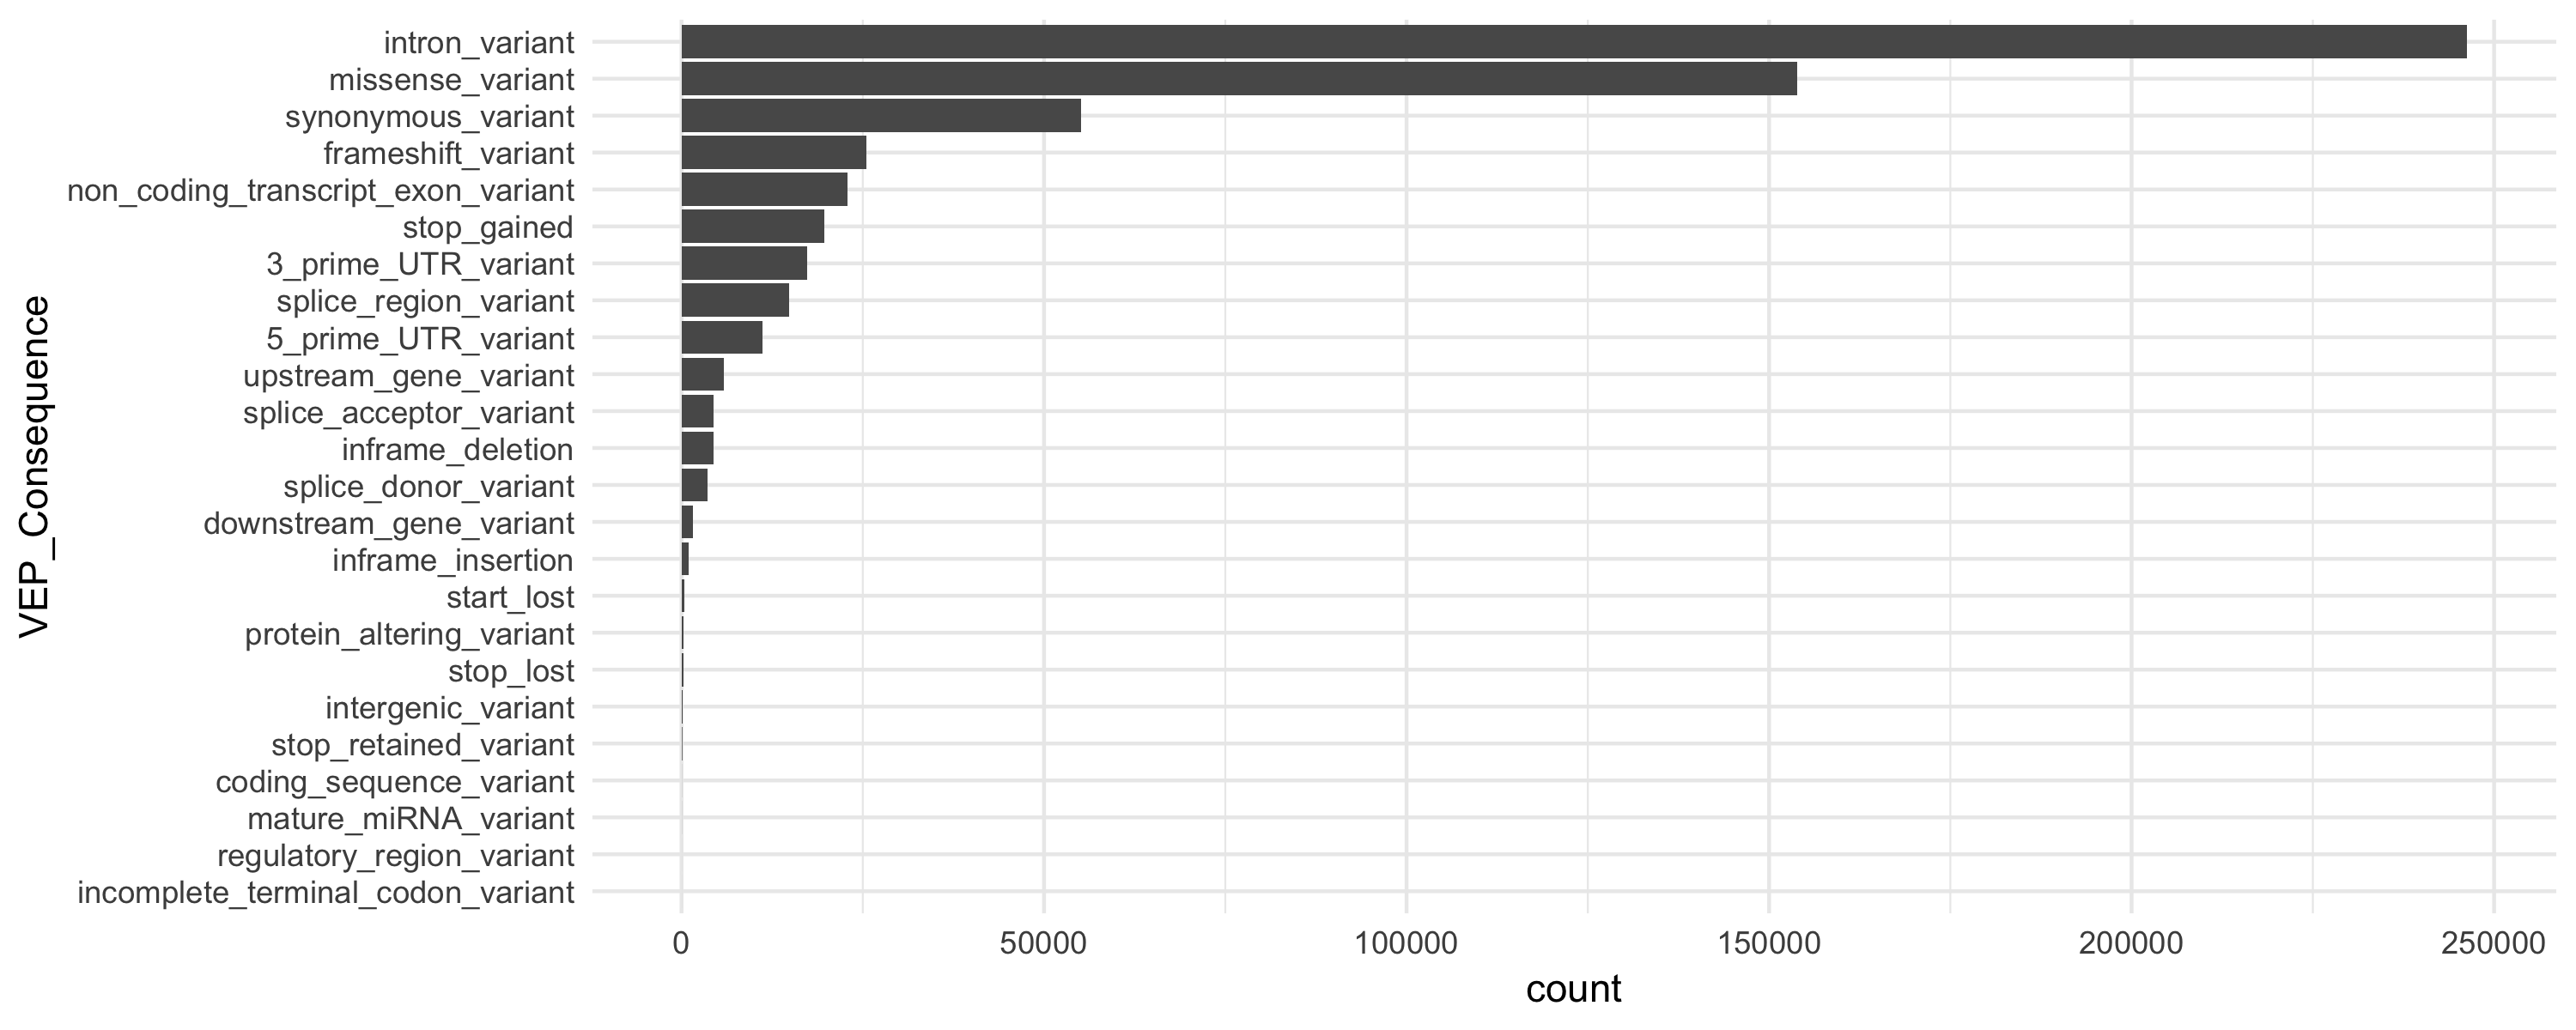

In [281]:
plot_histogram(impact, "VEP_Consequence", height = 4, flip = TRUE)

In [282]:
# [-375,418 rows] keep only the coding and splicing VEP_Consequence mutations
impact <- impact[impact$VEP_Consequence %in% c("missense_variant",
                                               "frameshift_variant",
                                               "stop_gained",
                                               "splice_acceptor_variant",
                                               "inframe_deletion",
                                               "splice_donor_variant",
                                               "inframe_insertion",
                                               "start_lost",
                                               "stop_lost"),]

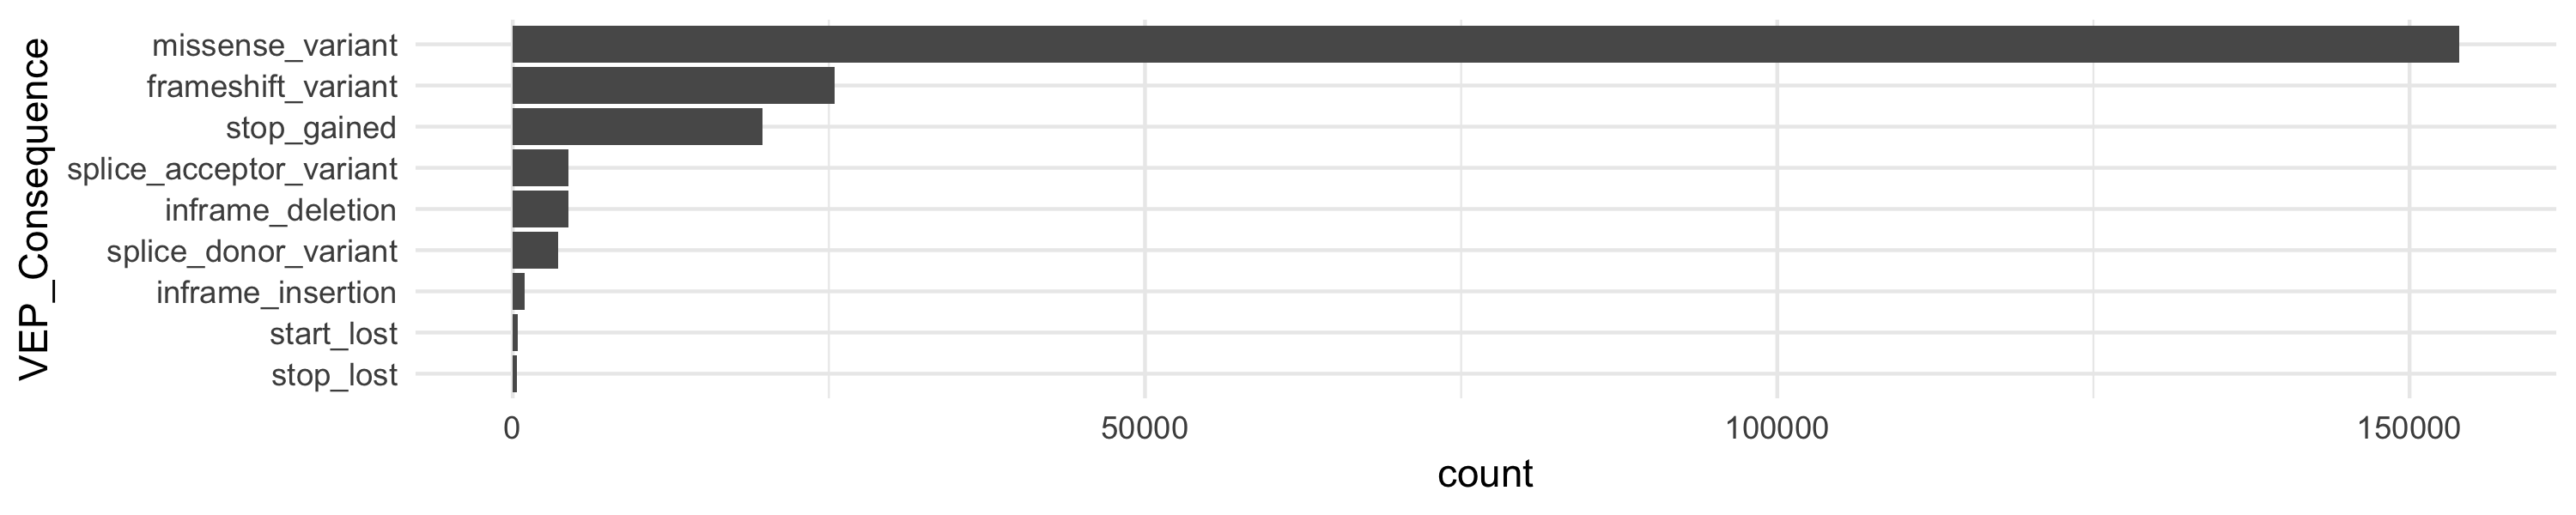

In [283]:
plot_histogram(impact, "VEP_Consequence", height = 2, flip = TRUE)

In [284]:
nrow(impact) # it was 588,547 before

[1] 213129

### [Remove] `confidence_class = UNKNOWN` or `confidence_class = OK_NOT_SO`

In [285]:
get_table(impact$confidence_class)

values,count,freq
AUTO_OK,187775,88.1%
UNLIKELY,13110,6.2%
MANUAL_OK,6748,3.2%
UNKNOWN,5464,2.6%
OK_NOT_SO,32,0%
-- total --,213129,100%


In [286]:
get_table(impact$Consequence[impact$confidence_class == "UNKNOWN"])
get_table(impact$VEP_Consequence[impact$confidence_class == "UNKNOWN"])

values,count,freq
intronic,2773,50.8%
exonic,1258,23%
synonymous_SNV,1024,18.7%
UTR3,167,3.1%
UTR5,118,2.2%
upstream,57,1%
Unknown,34,0.6%
stoploss_SNV,12,0.2%
splicing_noncanonical,11,0.2%
intergenic,4,0.1%


values,count,freq
missense_variant,4237,77.5%
frameshift_variant,421,7.7%
stop_gained,346,6.3%
splice_donor_variant,131,2.4%
splice_acceptor_variant,130,2.4%
inframe_deletion,77,1.4%
stop_lost,73,1.3%
start_lost,39,0.7%
inframe_insertion,10,0.2%
-- total --,5464,100%


In [287]:
# [-5,496 rows] remove rows having `confidence_class = UNKNOWN` or `confidence_class = OK_NOT_SO`
impact <- impact[! impact$confidence_class %in% c("UNKNOWN", "OK_NOT_SO"),]

### [Remove] `minor_contamination` > 0.01

In [288]:
print_count_and_proportion(nrow(impact[impact$minor_contamination > 0.01,]), nrow(impact))

[1] "9156 over 207633 (4.41%)"

In [289]:
# [-9,156 rows] remove the contaminated rows minor_contamination > 0.01
impact <- impact[impact$minor_contamination <= 0.01,]
# [-1 feature] remove the minor_contamination feature
impact["minor_contamination"] <- NULL

### [Remove] `n_depth` < 20

In [290]:
nrow(impact[impact$n_depth < 20,])

[1] 311

In [291]:
# [-311 rows] remove rows having n_depth < 20
impact <- impact[impact$n_depth >= 20,]

### [Remove] `t_alt_plus_count` + `t_alt_neg_count` != `t_alt_count`

In [292]:
nrow(impact[impact$t_alt_plus_count + impact$t_alt_neg_count != impact$t_alt_count,])

[1] 44

In [293]:
# [-44 rows] remove the rows having t_alt_plus_count + t_alt_neg_count != t_alt_count
impact <- impact[impact$t_alt_plus_count + impact$t_alt_neg_count == impact$t_alt_count,]

### [Create] new features: `sample_mut_key`, `patient_key`

In [294]:
# [+1 feature] create a sample mutation key feature to idenfity unique rows
impact$sample_mut_key <- paste(impact$Tumor_Sample_Barcode, impact$mut_key, sep = '_')

In [295]:
# [+1 feature] create a patient key feature to idenfity unique patient
impact$patient_key <- substr(impact$Tumor_Sample_Barcode, 1, 9)

### [Modify] `CDKN2Ap16INK4A` and `CDKN2Ap14ARF` reading frame

Two reading frame have been used for the gene `CDKN2A`:
* `CDKN2Ap16INK4A` is the "classic" reading frame for `CDKN2A`, the one used by OncoKB (see [OncoKB CDKN2A](http://oncokb.org/#/gene/CDKN2A))  
   → RefSeq. NM_000077.4  
   → [Homo sapiens cyclin dependent kinase inhibitor 2A (CDKN2A), transcript variant 1, mRNA](https://www.ncbi.nlm.nih.gov/nuccore/NM_000077.4)  
   → [Wikipedia article p16](https://en.wikipedia.org/wiki/P16)
* `CDKN2Ap14ARF` is an Alternative Reading Frame (ARF, as said in its name) for `CDKN2A`, not used by OncoKB  
  → RefSeq. NM_058195.3  
  → [Homo sapiens cyclin dependent kinase inhibitor 2A (CDKN2A), transcript variant 4, mRNA](https://www.ncbi.nlm.nih.gov/nuccore/NM_058195)  
  → [Wikipedia article p14arf](https://en.wikipedia.org/wiki/P14arf)
  
However, VEP thinks there's only one reading frame, the classic one `CDKN2A`. To correct this issue we:
* remove the mutations having the alternative reading frame and the classic reading frame in their tumor sample
* modify the `VEP_SYMBOL` of the mutations having the `CDKN2Ap14ARF` reading frame to `CDKN2Ap14ARF`

In [296]:
unique(impact$VEP_SYMBOL[impact$Hugo_Symbol %in% c("CDKN2Ap16INK4A", "CDKN2Ap14ARF")])

[1] "CDKN2A"

In [297]:
nrow(impact[impact$Hugo_Symbol == "CDKN2Ap16INK4A",])

[1] 1270

In [304]:
nrow(impact[impact$Hugo_Symbol == "CDKN2Ap14ARF",]) # mutations having the alternative reading data frame

dd <- impact %>% group_by(Tumor_Sample_Barcode) %>%
                 summarise(has_both_reading_frame = "CDKN2Ap14ARF" %in% Hugo_Symbol & "CDKN2Ap16INK4A" %in% Hugo_Symbol) %>%
                 filter(has_both_reading_frame)

# mutations having the alternative reading frame and the classic reading frame for this tumor sample
nrow(impact[impact$Hugo_Symbol == "CDKN2Ap14ARF" &
            impact$Tumor_Sample_Barcode %in% dd$Tumor_Sample_Barcode,]) 

[1] 758

[1] 713

We delete from `impact` the rows that are `CDKN2Ap14ARF` and have already been read in the classic reading frame:

In [306]:
# [-713 rows] Hugo_Symbol = CDKN2Ap14ARF and CDKN2Ap16INK4A in the tumor sample
impact <- impact[! (impact$Hugo_Symbol == "CDKN2Ap14ARF" & impact$Tumor_Sample_Barcode %in% dd$Tumor_Sample_Barcode),]

We correct the `VEP_SYMBOL` for the mutations read in the `CDKN2Ap14ARF` reading frame only:

In [308]:
# [~45 rows rows] change VEP_SYMBOL from CDKN2A to CDKN2Ap14ARF for the mutations read in the CDKN2Ap14ARF reading frame only
impact$VEP_SYMBOL[impact$Hugo_Symbol == "CDKN2Ap14ARF" & ! impact$Tumor_Sample_Barcode %in% dd$Tumor_Sample_Barcode] <- "CDKN2Ap14ARF"

### [Remove] the duplicated `sample_mut_key` rows

Some tumor sample have twice the same mutation, we keep the one with the minimal depth, and when the depth are equal the one with the minimum vaf.

In [55]:
impact_redundant <- impact %>% group_by(sample_mut_key) %>% filter(n() >= 2)
nrow(impact_redundant)

[1] 96

In [56]:
impact_redundant %>% group_by(sample_mut_key) %>% filter(n() > 3)

Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,occurence_in_normals,confidence_class,sample_coverage,mut_key,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_EXON,VEP_INTRON,VEP_IMPACT,VEP_CLIN_SIG,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT,VEP_gnomAD_AF,VEP_gnomAD_genome_AC.AN_AFR,VEP_gnomAD_genome_AC.AN_AMR,VEP_gnomAD_genome_AC.AN_ASJ,VEP_gnomAD_genome_AC.AN_EAS,VEP_gnomAD_genome_AC.AN_FIN,VEP_gnomAD_genome_AC.AN_NFE,VEP_gnomAD_genome_AC.AN_OTH,VEP_gnomAD_exome_AC.AN_AFR,VEP_gnomAD_exome_AC.AN_AMR,VEP_gnomAD_exome_AC.AN_ASJ,VEP_gnomAD_exome_AC.AN_EAS,VEP_gnomAD_exome_AC.AN_FIN,VEP_gnomAD_exome_AC.AN_NFE,VEP_gnomAD_exome_AC.AN_OTH,sample_mut_key,patient_key


In [57]:
head(impact_redundant[order(impact_redundant$sample_mut_key),], 10)

Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,occurence_in_normals,confidence_class,sample_coverage,mut_key,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_EXON,VEP_INTRON,VEP_IMPACT,VEP_CLIN_SIG,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT,VEP_gnomAD_AF,VEP_gnomAD_genome_AC.AN_AFR,VEP_gnomAD_genome_AC.AN_AMR,VEP_gnomAD_genome_AC.AN_ASJ,VEP_gnomAD_genome_AC.AN_EAS,VEP_gnomAD_genome_AC.AN_FIN,VEP_gnomAD_genome_AC.AN_NFE,VEP_gnomAD_genome_AC.AN_OTH,VEP_gnomAD_exome_AC.AN_AFR,VEP_gnomAD_exome_AC.AN_AMR,VEP_gnomAD_exome_AC.AN_ASJ,VEP_gnomAD_exome_AC.AN_EAS,VEP_gnomAD_exome_AC.AN_FIN,VEP_gnomAD_exome_AC.AN_NFE,VEP_gnomAD_exome_AC.AN_OTH,sample_mut_key,patient_key
BRCA1,17,41234541,41234541,nonsynonymous_SNV,SNP,C,T,P-0000096-T01-IM3,c.4237G>A,p.E1413K,48,0.22917,11,103,0,0,15,22,5,6,0,UNLIKELY,1084,17_41234541_C_T,Sub,BRCA1,c.4237G>A,p.E1413K,non_synonymous_codon,missense_variant,BRCA1,ENST00000471181.2:c.4237G>A,ENSP00000418960.2:p.Glu1413Lys,E/K,SNV,12|24,NA,MODERATE,NA,tolerated(0.41),benign(0.138),NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,P-0000096-T01-IM3_17_41234541_C_T,P-0000096
BRCA1,17,41234541,41234541,nonsynonymous_SNV,SNP,C,T,P-0000096-T01-IM3,c.4237G>A,p.E1413K,1061,0.27333,290,346,0,0,358,413,128,162,0,AUTO_OK,1084,17_41234541_C_T,Sub,BRCA1,c.4237G>A,p.E1413K,non_synonymous_codon,missense_variant,BRCA1,ENST00000471181.2:c.4237G>A,ENSP00000418960.2:p.Glu1413Lys,E/K,SNV,12|24,NA,MODERATE,NA,tolerated(0.41),benign(0.138),NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,P-0000096-T01-IM3_17_41234541_C_T,P-0000096
JAK3,19,17942137,17942137,nonsynonymous_SNV,SNP,C,T,P-0000096-T01-IM3,c.2878G>A,p.E960K,50,0.36000,18,90,0,0,16,16,6,12,0,UNLIKELY,1084,19_17942137_C_T,Sub,JAK3,c.2878G>A,p.E960K,non_synonymous_codon,missense_variant,JAK3,ENST00000458235.1:c.2878G>A,ENSP00000391676.1:p.Glu960Lys,E/K,SNV,21|24,NA,MODERATE,NA,deleterious(0),benign(0.372),NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,P-0000096-T01-IM3_19_17942137_C_T,P-0000096
JAK3,19,17942137,17942137,nonsynonymous_SNV,SNP,C,T,P-0000096-T01-IM3,c.2878G>A,p.E960K,698,0.44842,313,331,0,0,163,221,125,188,0,AUTO_OK,1084,19_17942137_C_T,Sub,JAK3,c.2878G>A,p.E960K,non_synonymous_codon,missense_variant,JAK3,ENST00000458235.1:c.2878G>A,ENSP00000391676.1:p.Glu960Lys,E/K,SNV,21|24,NA,MODERATE,NA,deleterious(0),benign(0.372),NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,P-0000096-T01-IM3_19_17942137_C_T,P-0000096
PTPRS,19,5246019,5246019,nonsynonymous_SNV,SNP,C,G,P-0000096-T01-IM3,c.756G>C,p.M252I,70,0.14286,10,64,0,0,29,31,4,6,0,UNLIKELY,1084,19_5246019_C_G,Sub,PTPRS,c.756G>C,p.M252I,non_synonymous_codon,missense_variant,PTPRS,ENST00000357368.4:c.756G>C,ENSP00000349932.4:p.Met252Ile,M/I,SNV,10|38,NA,MODERATE,NA,tolerated(0.07),benign(0),NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,P-0000096-T01-IM3_19_5246019_C_G,P-0000096
PTPRS,19,5246019,5246019,nonsynonymous_SNV,SNP,C,G,P-0000096-T01-IM3,c.756G>C,p.M252I,563,0.18295,103,227,0,0,154,306,40,63,0,AUTO_OK,1084,19_5246019_C_G,Sub,PTPRS,c.756G>C,p.M252I,non_synonymous_codon,missense_variant,PTPRS,ENST00000357368.4:c.756G>C,ENSP00000349932.4:p.Met252Ile,M/I,SNV,10|38,NA,MODERATE,NA,tolerated(0.07),benign(0),NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,P-0000096-T01-IM3_19_5246019_C_G,P-0000096
RHOA,3,49412884,49412884,nonsynonymous_SNV,SNP,C,T,P-0000096-T01-IM3,c.139G>A,p.E47K,58,0.39655,23,100,0,0,20,15,12,11,0,UNLIKELY,1084,3_49412884_C_T,Sub,RHOA,c.139G>A,p.E47K,non_synonymous_codon,missense_variant,RHOA,ENST00000418115.1:c.139G>A,ENSP00000400175.1:p.Glu47Lys,E/K,SNV,2|5,NA,MODERATE,NA,deleterious(0.04),possibly_damaging(0.903),NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,P-0000096-T01-IM3_3_494

In [58]:
impact_redundant_to_delete <- impact_redundant %>% group_by(sample_mut_key) %>% filter(t_depth == min(t_depth)) %>% filter(t_vaf == min(t_vaf))
nrow(impact_redundant_to_delete)

[1] 48

In [59]:
# [-48 rows] duplicated mutation for the same sample_mut_key
impact <- impact[! (impact$sample_mut_key %in% impact_redundant_to_delete$sample_mut_key &
                    impact$t_depth %in% impact_redundant_to_delete$t_depth &
                    impact$t_vaf %in% impact_redundant_to_delete$t_vaf),]

### [None] Remove hypermutated patients

In [60]:
tumor_summary <- impact %>% group_by(Tumor_Sample_Barcode) %>% summarise(number_of_mutations = n())
head(tumor_summary)

Tumor_Sample_Barcode,number_of_mutations
None-T01-IM6,6
P-0000012-T02-IM3,1
P-0000012-T03-IM3,30
P-0000023-T01-IM3,5
P-0000024-T01-IM3,6
P-0000025-T01-IM3,1


In [61]:
nrow(tumor_summary)
summary(tumor_summary$number_of_mutations)
nrow(tumor_summary[tumor_summary$number_of_mutations >= 100,])

[1] 22747

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   8.676   8.000 527.000 

[1] 141

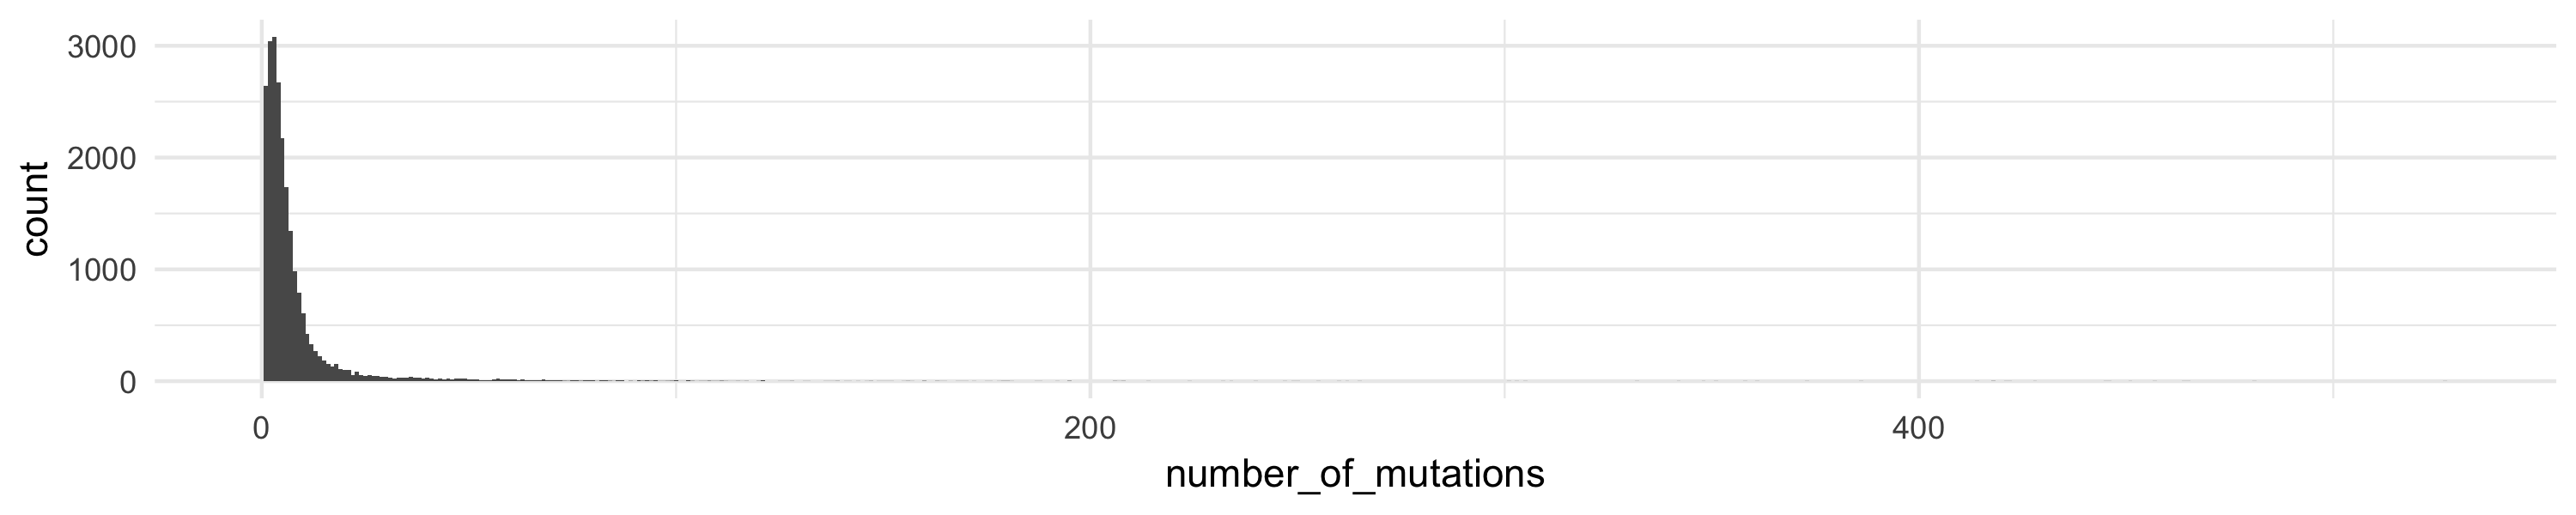

In [62]:
notebook_plot_size(10, 2)
ggplot(tumor_summary) + geom_histogram(aes(number_of_mutations), binwidth = 1)

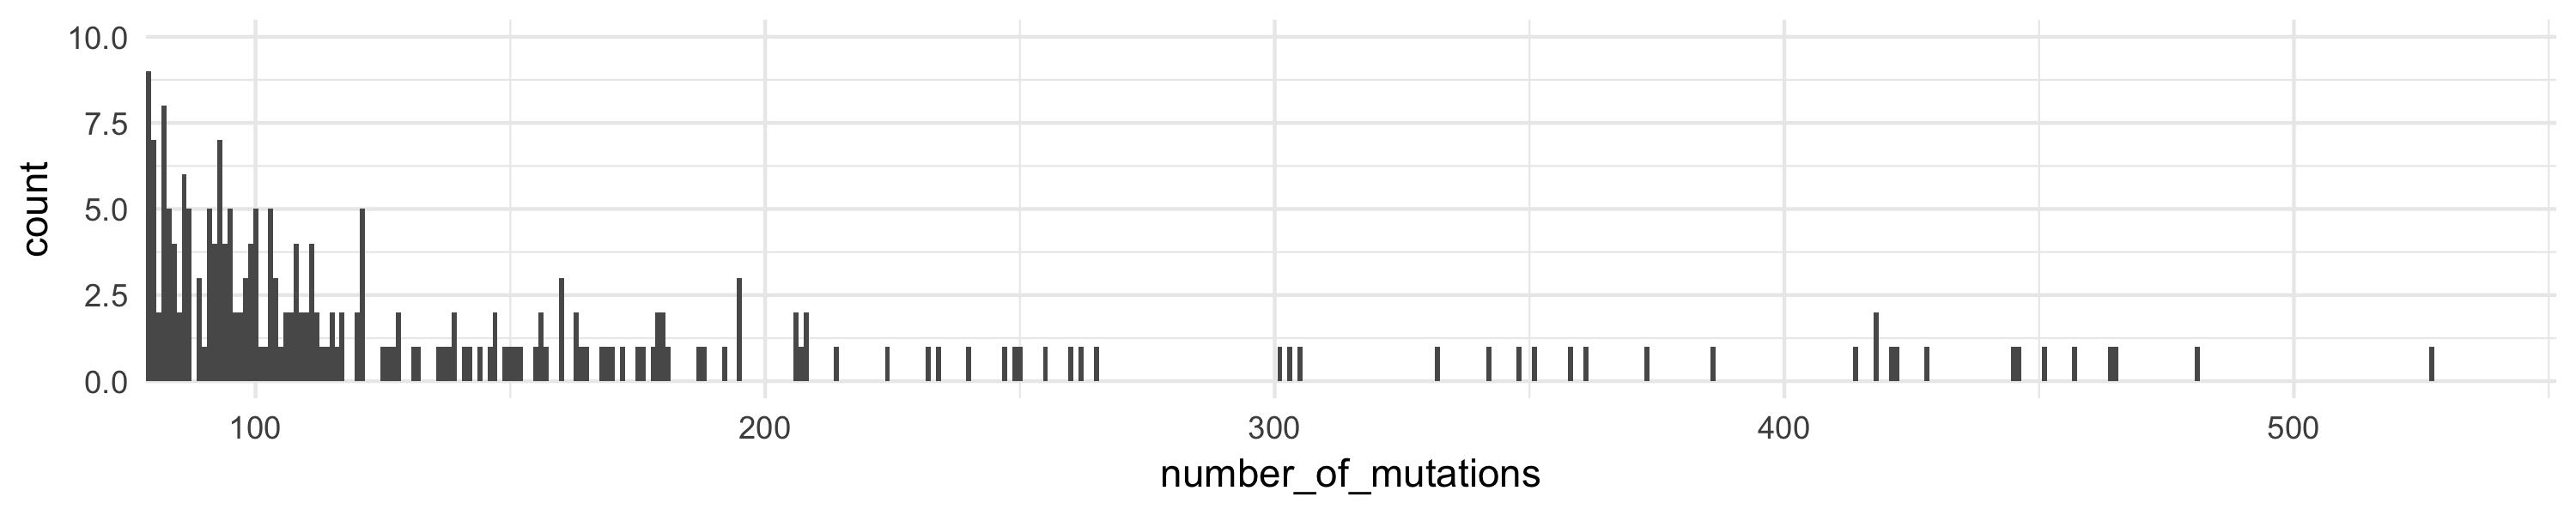

In [63]:
notebook_plot_size(10, 2)
ggplot(tumor_summary) + geom_histogram(aes(number_of_mutations), binwidth = 1) + coord_cartesian(xlim = c(100, 530), ylim = c(0, 10))

We decided not to remove any hypermutated patient.

### [Remove] DNP and TNP counted twice

In [64]:
overlapping_risk_dnp_or_tnp <- as.data.frame(impact %>% group_by(Tumor_Sample_Barcode, VEP_SYMBOL) %>%
                                             filter(n() > 1 &
                                                    "SNP" %in% Variant_Type &
                                                    ("DNP" %in% Variant_Type |
                                                     "TNP" %in% Variant_Type)))

nrow(overlapping_risk_dnp_or_tnp)

[1] 6774

In [65]:
find_overlapping_dnp_or_tnp <- function(data, tsb, chr, start) {
    result <- data %>% filter(Tumor_Sample_Barcode == tsb &
                              Chromosome == chr &
                              ((Variant_Type == "DNP" & (Start_Position == start | Start_Position == start - 1) |
                               (Variant_Type == "TNP" & (Start_Position == start | Start_Position == start - 1 | Start_Position == start - 2)))))

    if (nrow(result) == 0)
        return ("no")
    else
        return (toString(paste(nrow(result), result$Start_Position, result$Reference_Allele, result$Tumor_Seq_Allele2, result$t_vaf, result$confidence_class, sep = ' | ')))
}

In [66]:
overlapping_dnp_or_tnp <- overlapping_risk_dnp_or_tnp %>% filter(Variant_Type == "SNP") %>%
                                                          group_by(sample_mut_key) %>%
                                                          mutate(overlap = find_overlapping_dnp_or_tnp(overlapping_risk_dnp_or_tnp, Tumor_Sample_Barcode, Chromosome, Start_Position)) %>%
                                                          filter(overlap != "no") %>%
                                                          select(sample_mut_key, VEP_SYMBOL, Start_Position, Variant_Type, Reference_Allele, Tumor_Seq_Allele2, Tumor_Sample_Barcode, t_vaf, confidence_class, overlap)

nrow(overlapping_dnp_or_tnp)

[1] 3150

In [67]:
get_table(overlapping_dnp_or_tnp$confidence_class)

values,count,freq
UNLIKELY,3063,97.2%
AUTO_OK,77,2.4%
MANUAL_OK,10,0.3%
-- total --,3150,100%


In [68]:
head(overlapping_dnp_or_tnp[overlapping_dnp_or_tnp$confidence_class != "UNLIKELY",], 15)

sample_mut_key,VEP_SYMBOL,Start_Position,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,t_vaf,confidence_class,overlap
P-0005938-T01-IM5_6_32185789_T_A,NOTCH4,32185789,SNP,T,A,P-0005938-T01-IM5,0.20566,AUTO_OK,1 | 32185788 | CT | AA | 0.20879 | UNLIKELY
P-0006695-T01-IM5_16_11349328_G_T,SOCS1,11349328,SNP,G,T,P-0006695-T01-IM5,0.18836,MANUAL_OK,1 | 11349328 | GC | CT | 0.11644 | MANUAL_OK
P-0008466-T01-IM5_13_32918695_GATAC_AATAA,BRCA2,32918695,SNP,GATAC,AATAA,P-0008466-T01-IM5,0.37912,AUTO_OK,1 | 32918694 | GG | AA | 0.3811 | MANUAL_OK
P-0009189-T01-IM5_19_15296139_G_A,NOTCH3,15296139,SNP,G,A,P-0009189-T01-IM5,0.21229,AUTO_OK,1 | 15296139 | GG | AA | 0.22989 | AUTO_OK
P-0013826-T01-IM5_17_29556361_G_T,NF1,29556361,SNP,G,T,P-0013826-T01-IM5,0.17691,AUTO_OK,1 | 29556360 | GG | AT | 0.17691 | AUTO_OK
P-0013826-T01-IM5_2_158594125_G_A,ACVR1,158594125,SNP,G,A,P-0013826-T01-IM5,0.12270,AUTO_OK,1 | 158594124 | GG | AA | 0.12423 | AUTO_OK
P-0014227-T01-IM6_2_99154369_T_C,INPP4A,99154369,SNP,T,C,P-0014227-T01-IM6,0.06537,AUTO_OK,1 | 99154368 | CT | TC | 0.0683 | UNLIKELY
P-0014227-T01-IM6_19_10252808_A_T,DNMT1,10252808,SNP,A,T,P-0014227-T01-IM6,0.16612,AUTO_OK,1 | 10252808 | AG | TA | 0.16612 | UNLIKELY
P-0014227-T01-IM6_19_11018750_C_T,CARM1,11018750,SNP,C,T,P-0014227-T01-IM6,0.08494,AUTO_OK,1 | 11018749 | CC | TT | 0.08494 | UNLIKELY
P-0014229-T01-IM6_8_128748867_C_T,MYC,128748867,SNP,C,T,P-0014229-T01-IM6,0.38647,AUTO_OK,1 | 128748866 | CC | TT | 0.38647 | UNLIKELY


In [69]:
overlapping_dnp_or_tnp$other_t_vaf <- sapply(overlapping_dnp_or_tnp$overlap, function(x) as.numeric(strsplit(x, ' \\| ')[[1]][[5]]))

In [70]:
nrow(overlapping_dnp_or_tnp)
get_table(abs(overlapping_dnp_or_tnp$t_vaf - overlapping_dnp_or_tnp$other_t_vaf) > 0.01)
get_table(abs(overlapping_dnp_or_tnp$t_vaf - overlapping_dnp_or_tnp$other_t_vaf) > 0.05)

[1] 3150

values,count,freq
FALSE,3075,97.6%
TRUE,75,2.4%
-- total --,3150,100%


values,count,freq
FALSE,3142,99.7%
TRUE,8,0.3%
-- total --,3150,100%


In [71]:
get_table(overlapping_dnp_or_tnp$confidence_class[abs(overlapping_dnp_or_tnp$t_vaf - overlapping_dnp_or_tnp$other_t_vaf) > 0.01])

values,count,freq
UNLIKELY,68,90.7%
MANUAL_OK,4,5.3%
AUTO_OK,3,4%
-- total --,75,100%


In [72]:
# [-3151 rows] SNV found as DNP or TNP
impact <- impact[! impact$sample_mut_key %in% overlapping_dnp_or_tnp$sample_mut_key,]

### ??double SNPs

In [73]:
overlapping_risk_snps <- as.data.frame(impact %>% group_by(Tumor_Sample_Barcode, VEP_SYMBOL) %>%
                                                  filter(n() > 1 & "SNP" %in% Variant_Type))

nrow(overlapping_risk_snps)

[1] 39647

In [74]:
find_overlapping_snps <- function(data, tsb, chr, start) {
    result <- data %>% filter(Tumor_Sample_Barcode == tsb &
                              Chromosome == chr &
                              Variant_Type == "SNP" &
                              (Start_Position == start - 1 | Start_Position == start + 1))

    if (nrow(result) == 0)
        return ("no")
    else
        return (toString(paste(nrow(result), result$Start_Position, result$Reference_Allele, result$Tumor_Seq_Allele2)))
}

In [75]:
overlapping_snps <- overlapping_risk_snps %>% filter(Variant_Type == "SNP") %>%
                                                          group_by(sample_mut_key) %>%
                                                          mutate(overlap = find_overlapping_snps(overlapping_risk_snps, Tumor_Sample_Barcode, Chromosome, Start_Position)) %>%
                                                          filter(overlap != "no") %>%
                                                          select(sample_mut_key, VEP_SYMBOL, Start_Position, Variant_Type, Reference_Allele, Tumor_Seq_Allele2, Tumor_Sample_Barcode, overlap)

nrow(overlapping_snps)

[1] 267

In [76]:
head(overlapping_snps, 30)

sample_mut_key,VEP_SYMBOL,Start_Position,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,overlap
P-0000553-T01-IM3_20_57484421_G_A,GNAS,57484421,SNP,G,A,P-0000553-T01-IM3,1 57484420 C T
P-0000553-T01-IM3_20_57484420_C_T,GNAS,57484420,SNP,C,T,P-0000553-T01-IM3,1 57484421 G A
P-0000582-T01-IM3_9_21971028_C_T,CDKN2A,21971028,SNP,C,T,P-0000582-T01-IM3,1 21971027 C T
P-0000582-T01-IM3_9_21971027_C_T,CDKN2A,21971027,SNP,C,T,P-0000582-T01-IM3,1 21971028 C T
P-0000686-T01-IM3_20_40730817_G_A,PTPRT,40730817,SNP,G,A,P-0000686-T01-IM3,1 40730818 G T
P-0000686-T01-IM3_20_40730818_G_T,PTPRT,40730818,SNP,G,T,P-0000686-T01-IM3,1 40730817 G A
P-0000746-T01-IM3_19_1207108_G_C,STK11,1207108,SNP,G,C,P-0000746-T01-IM3,1 1207109 T C
P-0000746-T01-IM3_19_1207109_T_C,STK11,1207109,SNP,T,C,P-0000746-T01-IM3,1 1207108 G C
P-0001042-T01-IM3_6_157525059_A_G,ARID1B,157525059,SNP,A,G,P-0001042-T01-IM3,1 157525060 C T
P-0001042-T01-IM3_6_157525060_C_T,ARID1B,157525060,SNP,C,T,P-0001042-T01-IM3,1 157525059 A G


## Process raw features

### [Modify] deal with `NA` values

In [77]:
count_na <- function(data) {
    return (sum(is.na(data)))
}

In [78]:
replace_na <- function(data, feature_name, replace_value){
    data[is.na(data[,feature_name]), feature_name] <- replace_value
    
    return (data)
}

#### VAG

In [79]:
for (c in vag_colnames)
    print(sprintf("%17s: %d", c, count_na(impact[,c])))

[1] "           VAG_VT: 0"
[1] "         VAG_GENE: 112"
[1] "  VAG_cDNA_CHANGE: 166"
[1] "VAG_PROTEIN_CHANGE: 166"
[1] "       VAG_EFFECT: 112"


In [80]:
impact <- replace_na(impact, "VAG_GENE"          , "unknown")
impact <- replace_na(impact, "VAG_cDNA_CHANGE"   , "unknown")
impact <- replace_na(impact, "VAG_PROTEIN_CHANGE", "unknown")
impact <- replace_na(impact, "VAG_EFFECT"        , "unknown")

#### VEP

In [81]:
for (c in vep_colnames)
    print(sprintf("%17s: %d", c, count_na(impact[,c])))

[1] "  VEP_Consequence: 0"
[1] "       VEP_SYMBOL: 0"
[1] "        VEP_HGVSc: 5"
[1] "        VEP_HGVSp: 7175"
[1] "  VEP_Amino_acids: 7158"
[1] "VEP_VARIANT_CLASS: 0"
[1] "         VEP_EXON: 5850"
[1] "       VEP_INTRON: 187087"


In [82]:
impact[is.na(impact$VEP_HGVSc),]

Hugo_Symbol Chromosome Start_Position End_Position
92105  CDKN2A      9          21974658       21974895    
286621 MAPK3       16         30134458       30135078    
287992 SMAD3       15         67457371       67457373    
355886 MSH2        2          47630177       47630419    
411327 AURKB       17          8108003        8108479    
       Consequence            Variant_Type
92105  splicing               DEL         
286621 nonsynonymous_SNV      DEL         
287992 nonframeshift_deletion DEL         
355886 nonsynonymous_SNV      DEL         
411327 splicing               DEL         
       Reference_Allele                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
92105  CTGCAGACCCTCTACCCACCTGGATCGGCCTCCGACCGTAACTATTCGGTGCGTTGGGCAGCGCCCCCGCCTCCAGCAGCGCCCGCACCTCCTCTACCCGACCCCGGGCCGCGGCCGTGGCCAGCCAGTCAGCCGAAGGCTCCATGCTGCTCCCCGCCGCCGGCTCCATGCTGCTCCCCGCCGCCCGCTGCCTGCTCTCCCCCTCTCCGCAGCCGCCGAGCGCACGCGGTCCGCCCCA                                                                                                                                                                                                                                                                                                                                                                                               
286621 GGACCCCCGGGCCGACCCCCTCGGTTCTACGGGGCTCCCCGCCCCCGCCCCCCTGAGCCGCCGCCGCCGCCATCTCCACTCCTCCCCTCCCACCGCCCTCCTCCCCACGGCGGCCCCGCCCGAGGCCCCGCCCCTTCCCGCCTGCCTGTCACCCGCAGGGCCGCGCGCGCCAGGCCCCGCCCTTGCCCCGGCCCCGCGTGGGCCTGGAGCTGTCACGTGACCCGCCCCGCGCGCGCCCGCCCTTCTTGCCCCAGGTTCGGGGGCCATGGGTCCCTGCGGGCTCCGCGGCCTCCAGGTCACCGGGAGGTTCGGCAGCGCCGCCTCGGAGACTGTCCTCACCCTCCCCTCGATGGCGAAGCGGCCAGGGCGTGACCTACCAGAGCCACCCAGCCAATGTATGCGGCAGCCCACCAGAACCTGGGCCCGGGATCACCCTAGGTTAAAAATAATGTTCTAATAAATGGATCAAATTTTACAGATGGAGAATCTGAGAGTTAGGTTTACTAACTTGGGTAAGGTCACTAGTAGTGACAGCTGAGACTCAAAATGGTGTCTTCTGACACAGAGACTCTTTCTAATTCCATGCCTCTCAGAGTCCTAGACTGTTTTTATTTTATTATA
287992 GAA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
355886 GACTCCCACCCACCGAAACGCAGCCCTGGAAGCTGATTGGGTGTGGTCGCCGTGGCCGGACGCCGCTCGGGGGACGTGGGAGGGGAGGCGGGAAACAGCTTAGTGGGTGTGGGGTCGCGCATTTTCTTCAACCAGGAGGTGAGGAGGTTTCGACATGGCGGTGCAGCCGAAGGAGACGCTGCAGTTGGAGAGCGCGGCCGAGGTCGGCTTCGTGCGCTTCTTTCAGGGCATGCCGGAGAAGCC                                                                                                                                                                                                                                                                                                                                                                                          
411327 GAACAGCTTCCTCCACAGCAAAGCCTCCACCTAGAAACATCTACACTCATGAGTACAAAAAGCTTCAGCCTTTATTAAACAAAGGAGGAGGTAGAAAACAGATAAGGGAACAGTTAGGGATCCCTTCTTTCCCCTATACATACACAGACATACAAACACACGCACCCGAGTGAATGACAGGGACCATCAGGCGACAGATTGAAGGGCAGAGGGAGGCAGCACCCTCCGAGAGTTGGCCCGGACCCAAGG

7280 mutations have `VEP_HGVSp` = `NA`, almost all of them being splicing mutations:

In [83]:
get_table(impact$VEP_Consequence[is.na(impact$VEP_HGVSp)])

values,count,freq
splice_acceptor_variant,3838,53.5%
splice_donor_variant,3175,44.3%
frameshift_variant,87,1.2%
stop_lost,41,0.6%
start_lost,20,0.3%
inframe_insertion,6,0.1%
inframe_deletion,5,0.1%
stop_gained,3,0%
-- total --,7175,100%


7280 mutations have `VEP_Amino_acids` = `NA`, most of them being the one having `VEP_HGVSp = NA`:

In [84]:
count_na(impact$VEP_Amino_acids)
table(impact$mut_key[is.na(impact$VEP_Amino_acids)] %in% impact$mut_key[is.na(impact$VEP_HGVSp)])

[1] 7158


FALSE  TRUE 
   85  7073 

In [85]:
get_table(impact$VEP_Consequence[is.na(impact$VEP_Amino_acids) & ! is.na(impact$VEP_HGVSp)])

values,count,freq
splice_acceptor_variant,85,100%
-- total --,85,100%


In [86]:
nrow(impact[impact$VEP_Consequence == "splice_acceptor_variant" & ! is.na(impact$VEP_HGVSp) & impact$VEP_HGVSp != "unknown",])
nrow(impact[impact$VEP_Consequence == "splice_donor_variant" & ! is.na(impact$VEP_HGVSp) & impact$VEP_HGVSp != "unknown",])

[1] 112

[1] 0

In [87]:
impact <- replace_na(impact, "VEP_HGVSc"      , "unknown")
impact <- replace_na(impact, "VEP_HGVSp"      , "unknown")
impact <- replace_na(impact, "VEP_Amino_acids", "unknown")

`VEP_EXON` and `VEP_INTRON` are complementary: when one is `NA` the other has a value, except for 41 cases.

In [88]:
get_table(is.na(impact$VEP_EXON) & is.na(impact$VEP_INTRON))

values,count,freq
FALSE,194170,100%
TRUE,41,0%
-- total --,194211,100%


#### VEP additional

In [89]:
for (c in vep_add_colnames)
    print(sprintf("%17s: %d", c, count_na(impact[,c])))

[1] "       VEP_IMPACT: 0"
[1] "     VEP_CLIN_SIG: 164736"
[1] "         VEP_SIFT: 55800"
[1] "     VEP_PolyPhen: 54975"
[1] "   VEP_COSMIC_CNT: 130629"


`NA` values might correspond to not found, we replace them by `"unknown"`:

In [90]:
impact <- replace_na(impact, "VEP_CLIN_SIG"   , "unknown")
impact <- replace_na(impact, "VEP_SIFT"       , "unknown")
impact <- replace_na(impact, "VEP_PolyPhen"   , "unknown")
impact <- replace_na(impact, "VEP_COSMIC_CNT" , "unknown")

#### VEP gnomAD

In [91]:
for (c in vep_gnomad_colnames)
    print(sprintf("%27s: %d", c, count_na(impact[,c])))

[1] "              VEP_gnomAD_AF: 155362"
[1] "VEP_gnomAD_genome_AC.AN_AFR: 180088"
[1] "VEP_gnomAD_genome_AC.AN_AMR: 180088"
[1] "VEP_gnomAD_genome_AC.AN_ASJ: 180088"
[1] "VEP_gnomAD_genome_AC.AN_EAS: 180088"
[1] "VEP_gnomAD_genome_AC.AN_FIN: 180088"
[1] "VEP_gnomAD_genome_AC.AN_NFE: 180088"
[1] "VEP_gnomAD_genome_AC.AN_OTH: 180088"
[1] " VEP_gnomAD_exome_AC.AN_AFR: 145767"
[1] " VEP_gnomAD_exome_AC.AN_AMR: 145767"
[1] " VEP_gnomAD_exome_AC.AN_ASJ: 145767"
[1] " VEP_gnomAD_exome_AC.AN_EAS: 145767"
[1] " VEP_gnomAD_exome_AC.AN_FIN: 145767"
[1] " VEP_gnomAD_exome_AC.AN_NFE: 145767"
[1] " VEP_gnomAD_exome_AC.AN_OTH: 145767"


`NA` values might correspond to not found, we replace them by a null allele value, or by `0 | 0` for the Allele count | Total number of alleles:

In [92]:
impact <- replace_na(impact, "VEP_gnomAD_AF", 0.0)

for (c in vep_gnomad_colnames[grepl("_AC.AN_", vep_gnomad_colnames)])
    impact <- replace_na(impact, c, " 0 | 0")

### [Modify] `occurence_in_normals` -> `frequency_in_normals`

In [93]:
dd <- head(unique(impact$occurence_in_normals), 10)
dd[dd == '0'] <- "0;0"
dd <- data.frame(dd, sapply(dd, function(s) as.double(strsplit(s, split = ';')[[1]][2])), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old,new
0;0,0.000
0;0,0.000
1;0.026,0.026
6;0.158,0.158
3;0.079,0.079
4;0.105,0.105
7;0.184,0.184
2;0.051,0.051
6;0.154,0.154
3;0.077,0.077


In [94]:
# [~ every rows] occurence_in_normals -> frequency_in_normals
impact$occurence_in_normals[impact$occurence_in_normals == '0'] <- "0;0"
impact$frequency_in_normals <- sapply(impact$occurence_in_normals,
                                      function(s) as.double(strsplit(s, split = ';')[[1]][2]))
impact$occurence_in_normals <- NULL

### [Modify] `VEP_HGVSc`

In [95]:
dd <- head(impact$VEP_HGVSc, 10)
dd <- data.frame(dd, sapply(dd, function(x) strsplit(x, ':')[[1]][2]), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old,new
ENST00000269305.4:c.766A>C,c.766A>C
ENST00000262741.5:c.894C>G,c.894C>G
ENST00000350721.4:c.7292G>T,c.7292G>T
ENST00000257290.5:c.1393T>A,c.1393T>A
ENST00000281708.4:c.1237-1G>T,c.1237-1G>T
ENST00000281708.4:c.181G>T,c.181G>T
ENST00000264932.6:c.1444C>T,c.1444C>T
ENST00000399503.3:c.904G>T,c.904G>T
ENST00000399503.3:c.2087+2T>G,c.2087+2T>G
ENST00000439151.2:c.5338G>T,c.5338G>T


In [96]:
# [~ every rows] VEP_HGVSc -> readable VEP_HGVSc
impact$VEP_HGVSc <- sapply(impact$VEP_HGVSc, function(x) strsplit(x, ':')[[1]][2])

### [Modify] `VEP_HGVSp`

In [97]:
get_HGVSp_from_vep <- function(HGVSp_string) {
    
    if (HGVSp_string == "unknown")
        return ("unknown")
    
    HGVSp_string <- strsplit(HGVSp_string, ':')[[1]][2]
    
    protein_long_name <- c('Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Glu', 'Gln', 'Gly', 'His', 'Ile', 'Leu', 'Lys',
                           'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val')
    protein_short_name <- c('A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K',
                            'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V')
    
    for (name in protein_long_name)
        HGVSp_string <- gsub(name, protein_short_name[match(name, protein_long_name)], HGVSp_string)
    
    HGVSp_string <- gsub('Ter', '*', HGVSp_string)
    HGVSp_string <- gsub('%3D', '=', HGVSp_string)
    
    return (HGVSp_string)
}

In [98]:
dd <- head(impact$VEP_HGVSp, 10)
dd <- data.frame(dd, sapply(dd, get_HGVSp_from_vep), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old,new
ENSP00000269305.4:p.Thr256Pro,p.T256P
ENSP00000262741.5:p.Ile298Met,p.I298M
ENSP00000343741.4:p.Arg2431Met,p.R2431M
ENSP00000257290.5:p.Leu465Met,p.L465M
unknown,unknown
ENSP00000281708.3:p.Gly61Ter,p.G61*
ENSP00000264932.6:p.Pro482Ser,p.P482S
ENSP00000382423.3:p.Glu302Ter,p.E302*
unknown,unknown
ENSP00000395929.2:p.Val1780Phe,p.V1780F


In [99]:
# [~ every rows] VEP_HGVSp -> readable VEP_HGVSp
impact$VEP_HGVSp <- sapply(impact$VEP_HGVSp, get_HGVSp_from_vep)

### [Modify] `VEP_SIFT`

In [100]:
dd <- head(unique(impact$VEP_SIFT), 10)
dd <- data.frame(dd,
                 sapply(dd, function(x) strsplit(x, '\\(')[[1]][1]),
                 sapply(dd, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2]))),
                 row.names = NULL)
colnames(dd) <- c("old", "new1", "new2")
dd

old,new1,new2
deleterious(0),deleterious,0.00
deleterious(0.01),deleterious,0.01
unknown,unknown,NA
tolerated_low_confidence(0.12),tolerated_low_confidence,0.12
tolerated(0.4),tolerated,0.40
tolerated(0.17),tolerated,0.17
deleterious(0.02),deleterious,0.02
deleterious_low_confidence(0),deleterious_low_confidence,0.00
tolerated_low_confidence(0.1),tolerated_low_confidence,0.10
tolerated(0.08),tolerated,0.08


In [101]:
# [~ every rows] VEP_SIFT -> VEP_SIFT_class & VEP_SIFT_score
impact$VEP_SIFT_class <- sapply(impact$VEP_SIFT, function(x) strsplit(x, '\\(')[[1]][1])
impact$VEP_SIFT_score <- sapply(impact$VEP_SIFT, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2])))
impact$VEP_SIFT <- NULL

### [Modify] `VEP_PolyPhen`

In [102]:
dd <- head(unique(impact$VEP_PolyPhen), 10)
dd <- data.frame(dd,
                 sapply(dd, function(x) strsplit(x, '\\(')[[1]][1]),
                 sapply(dd, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2]))),
                 row.names = NULL)
colnames(dd) <- c("old", "new1", "new2")
dd

old,new1,new2
probably_damaging(0.999),probably_damaging,0.999
benign(0.277),benign,0.277
probably_damaging(0.997),probably_damaging,0.997
probably_damaging(0.965),probably_damaging,0.965
unknown,unknown,NA
benign(0.005),benign,0.005
probably_damaging(0.952),probably_damaging,0.952
possibly_damaging(0.738),possibly_damaging,0.738
probably_damaging(0.995),probably_damaging,0.995
possibly_damaging(0.472),possibly_damaging,0.472


In [103]:
# [~ every rows] VEP_PolyPhen -> VEP_PolyPhen_class & VEP_PolyPhen_score
impact$VEP_PolyPhen_class <- sapply(impact$VEP_PolyPhen, function(x) strsplit(x, '\\(')[[1]][1])
impact$VEP_PolyPhen_score <- sapply(impact$VEP_PolyPhen, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2])))
impact$VEP_PolyPhen <- NULL

### [Modify] `VEP_COSMIC_CNT`

In [104]:
get_cosmic_count_from_vep <- function(cosmic_count_string) {
    if (cosmic_count_string == "unknown")
        return (0)
    else
        return (sum(as.numeric(strsplit(cosmic_count_string, '&')[[1]])))
}

dd <- head(unique(impact$VEP_COSMIC_CNT), 10)
dd <- data.frame(dd, sapply(dd, get_cosmic_count_from_vep), row.names = NULL)
colnames(dd) <- c("old", "new1")
dd

old,new1
1,1
unknown,0
1&1&1&1&1&1,6
1&1&1,3
1&1,2
53,53
158,158
19&21&14,54
229&230&200&230&179&789,1857
42&170,212


In [105]:
# [~ every rows] VEP_COSMIC_CNT -> readable VEP_COSMIC_CNT
impact$VEP_COSMIC_CNT <- sapply(impact$VEP_COSMIC_CNT, get_cosmic_count_from_vep)

### [Modify] VEP_CLIN_SIG

In [106]:
get_table(impact$VEP_CLIN_SIG) %>% filter(count >= 200)

values,count,freq
unknown,164736,84.8%
likely_pathogenic&pathogenic,8307,4.3%
not_provided&likely_pathogenic&pathogenic,4874,2.5%
pathogenic,3610,1.9%
likely_pathogenic,3211,1.7%
uncertain_significance,3207,1.7%
uncertain_significance&likely_pathogenic,826,0.4%
uncertain_significance&pathogenic,625,0.3%
not_provided,618,0.3%
likely_pathogenic&pathogenic&drug_response,592,0.3%


We group the values with the following rules:
* We consider 3 big different classes:
    * `pathogenic`: `pathogenic`, `likely_pathogenic`, `drug_response`, `risk_factor`
    * `benign`: `benign`, `likely_benign`
    * `unknown`: `NA` (has been previously replaced by `unknown`), `not_provided`, `uncertain_significance`
* A mutation having both `pathogenic` and `benign` classes is classified as `unknown`
* A mutation having a strong class (`pathogenic` or `benign`) and `unknown` class is classified as the strong class

In [107]:
get_simplified_clin_sig <- function(clin_sig_string) {
    if (clin_sig_string == "unknown")
        return ("unknown")
    else {
        tags <- unique(strsplit(clin_sig_string, '&')[[1]])
        
        tags <- gsub('likely_pathogenic', 'pathogenic', tags)
        tags <- gsub('drug_response'    , 'pathogenic', tags)
        tags <- gsub('risk_factor'      , 'pathogenic', tags)
        tags <- gsub('likely_benign'    , 'benign'    , tags)
        
        tags <- tags[! tags %in% c("not_provided", "uncertain_significance", "other")]
        
        if (length(tags) == 0 || length(tags) > 1)
            return ("unknown")
        else
            return (tags)
    }
}

In [108]:
dd <- head(unique(impact$VEP_CLIN_SIG), 20)
dd <- data.frame(dd, sapply(dd, get_simplified_clin_sig), row.names = NULL)
colnames(dd) <- c("old", "new1")
dd

old,new1
unknown,unknown
likely_pathogenic&pathogenic,unknown
uncertain_significance&benign,benign
uncertain_significance,unknown
uncertain_significance&likely_pathogenic&pathogenic,unknown
pathogenic,pathogenic
uncertain_significance&pathogenic,pathogenic
likely_benign,benign
likely_pathogenic,pathogenic
not_provided&likely_pathogenic&pathogenic,unknown


In [109]:
# [~ every rows] VEP_CLIN_SIG -> readable VEP_CLIN_SIG
impact$VEP_CLIN_SIG <- sapply(impact$VEP_CLIN_SIG, get_simplified_clin_sig)

In [110]:
get_table(impact$VEP_CLIN_SIG)

values,count,freq
unknown,184230,94.9%
pathogenic,9039,4.7%
benign,942,0.5%
-- total --,194211,100%


### [Modify & Create & Remove] vep_gnomad_colnames

#### `genome_AC.AN_<POP>` & `exome_AC.AN_<POP>` -> `total_AC.AN_<POP>`

In [111]:
get_gnomAD_total_AC.AN <- function(data, pop_name) {
    genome_AC = as.integer(strsplit(data[paste0("VEP_gnomAD_genome_AC.AN_", pop_name)], ' \\| ')[[1]][1])
    genome_AN = as.integer(strsplit(data[paste0("VEP_gnomAD_genome_AC.AN_", pop_name)], ' \\| ')[[1]][2])

    exome_AC = as.integer(strsplit(data[paste0("VEP_gnomAD_exome_AC.AN_", pop_name)], ' \\| ')[[1]][1])
    exome_AN = as.integer(strsplit(data[paste0("VEP_gnomAD_exome_AC.AN_", pop_name)], ' \\| ')[[1]][2])
    
    return (paste(genome_AC + exome_AC, genome_AN + exome_AN, sep = ' | '))
}

In [112]:
dd <- tail(unique(impact[, c("VEP_gnomAD_genome_AC.AN_AFR", "VEP_gnomAD_exome_AC.AN_AFR")]), 10)
dd <- data.frame(dd, apply(dd, 1, function(x) get_gnomAD_total_AC.AN(x, "AFR")), row.names = NULL)
colnames(dd) <- c("genome_AC.AN_AFR", "exome_AC.AN_AFR", "new (total_AC.AN_AFR)")
dd

genome_AC.AN_AFR,exome_AC.AN_AFR,new (total_AC.AN_AFR)
0 | 8658,0 | 15112,0 | 23770
3 | 8724,5 | 15280,8 | 24004
0 | 0,0 | 7460,0 | 7460
0 | 0,0 | 11209,0 | 11209
1 | 8720,0 | 8798,1 | 17518
2 | 8726,4 | 15288,6 | 24014
10 | 8722,16 | 15302,26 | 24024
0 | 8714,0 | 14190,0 | 22904
2 | 8718,3 | 14734,5 | 23452
0 | 0,0 | 1688,0 | 1688


In [113]:
pop_names <- c('AFR', 'AMR', 'ASJ', 'EAS', 'FIN', 'NFE', 'OTH')

for (pop in pop_names)
    impact[, paste0("VEP_gnomAD_total_AC.AN_", pop)] <- apply(impact, 1, function(x) get_gnomAD_total_AC.AN(x, pop))

#### `total_AC.AN_<POP>` -> `total_AF_<POP>`

In [114]:
get_gnomAD_total_AF <- function(data, pop_name) {
        
    AC = as.integer(strsplit(data[paste0("VEP_gnomAD_total_AC.AN_", pop_name)], ' \\| ')[[1]][1])
    AN = as.integer(strsplit(data[paste0("VEP_gnomAD_total_AC.AN_", pop_name)], ' \\| ')[[1]][2])
    
    if (AN == 0)
        return (0)
    else
        return (AC / AN)
}

In [115]:
dd <- tail(unique(impact[, c("VEP_gnomAD_total_AC.AN_AFR",
                             "VEP_gnomAD_total_AC.AN_AMR")]), 10)
dd <- data.frame(dd, apply(dd, 1, function(x) get_gnomAD_total_AF(x, "AFR")),
                     apply(dd, 1, function(x) get_gnomAD_total_AF(x, "AMR")), row.names = NULL)
colnames(dd) <- c("total_AC.AN_AFR", "total_AC.AN_AMR", "new1 (total_AF_AFR)", "new2 (total_AF_AMR)")
dd

total_AC.AN_AFR,total_AC.AN_AMR,new1 (total_AF_AFR),new2 (total_AF_AMR)
6 | 24014,0 | 34318,0.0002498543,0.000000e+00
2 | 24030,28 | 34420,0.0000832293,8.134805e-04
3 | 24032,30 | 34418,0.0001248336,8.716369e-04
26 | 24024,28 | 34418,0.0010822511,8.135278e-04
0 | 22904,4 | 34296,0.0000000000,1.166317e-04
5 | 24016,0 | 34418,0.0002081945,0.000000e+00
0 | 15030,0 | 33348,0.0000000000,0.000000e+00
0 | 15242,0 | 33248,0.0000000000,0.000000e+00
5 | 23452,0 | 30088,0.0002132014,0.000000e+00
0 | 1688,1 | 20806,0.0000000000,4.806306e-05


In [116]:
for (pop in pop_names)
    impact[, paste0("VEP_gnomAD_total_AF_", pop)] <- apply(impact, 1, function(x) get_gnomAD_total_AF(x, pop))

#### `total_AC.AN_<POP>` -> `VEP_gnomAD_AF_MAX`

In [117]:
dd <- tail(unique(impact[, c("VEP_gnomAD_total_AF_AFR",
                             "VEP_gnomAD_total_AF_AMR")]), 10)

total_AF_columns <- colnames(dd)[grepl("VEP_gnomAD_total_AF_", colnames(dd))]

dd <- data.frame(dd, apply(dd, 1, function(x) max(as.numeric(x[total_AF_columns]))), row.names = NULL)
colnames(dd) <- c("total_AF_AFR", "total_AF_AMR", "new")
dd

total_AF_AFR,total_AF_AMR,new
0.000000e+00,4.074316e-05,4.074316e-05
6.637462e-05,2.989000e-05,6.637462e-05
5.708414e-05,0.000000e+00,5.708414e-05
8.322930e-05,8.134805e-04,8.134805e-04
1.248336e-04,8.716369e-04,8.716369e-04
1.082251e-03,8.135278e-04,1.082251e-03
0.000000e+00,1.166317e-04,1.166317e-04
2.081945e-04,0.000000e+00,2.081945e-04
2.132014e-04,0.000000e+00,2.132014e-04
0.000000e+00,4.806306e-05,4.806306e-05


In [118]:
total_AF_columns <- colnames(impact)[grepl("VEP_gnomAD_total_AF_", colnames(impact))]
impact$VEP_gnomAD_AF_MAX <- apply(impact, 1, function(x) max(as.numeric(x[total_AF_columns])))

#### `total_AC.AN_<POP>` -> `VEP_gnomAD_AF_MEAN`

In [119]:
get_gnomAD_AF_MEAN <- function(data) {
    
    AC <- c()
    AN <- c()
    
    for (pop in pop_names) {
        AC <- c(AC, as.integer(strsplit(data[paste0("VEP_gnomAD_total_AC.AN_", pop)], ' \\| ')[[1]][1]))
        AN <- c(AN, as.integer(strsplit(data[paste0("VEP_gnomAD_total_AC.AN_", pop)], ' \\| ')[[1]][2]))
    }
                
    if (sum(AN) == 0)
        return (0)
    else
        return (sum(AC) / sum(AN))
}

In [120]:
total_AC.AN_columns <- colnames(impact)[grepl("VEP_gnomAD_total_AC.AN_", colnames(impact))]

dd <- tail(unique(impact[, total_AC.AN_columns]), 10)
dd <- data.frame(dd, apply(dd, 1, get_gnomAD_AF_MEAN), row.names = NULL)
colnames(dd) <- c(total_AC.AN_columns, "new")
dd

VEP_gnomAD_total_AC.AN_AFR,VEP_gnomAD_total_AC.AN_AMR,VEP_gnomAD_total_AC.AN_ASJ,VEP_gnomAD_total_AC.AN_EAS,VEP_gnomAD_total_AC.AN_FIN,VEP_gnomAD_total_AC.AN_NFE,VEP_gnomAD_total_AC.AN_OTH,new
0 | 15300,0 | 33572,0 | 9842,0 | 17224,0 | 22294,3 | 111528,0 | 5480,1.393793e-05
5 | 24016,0 | 34418,0 | 10144,0 | 18868,0 | 25790,2 | 126268,1 | 6464,3.252456e-05
0 | 15030,0 | 33348,0 | 9800,0 | 17158,0 | 21648,0 | 110380,0 | 5418,0.000000e+00
0 | 15242,0 | 33248,0 | 9818,0 | 17020,0 | 22286,0 | 110702,0 | 5434,0.000000e+00
5 | 23452,0 | 30088,0 | 6046,8 | 18336,1 | 22652,7 | 106676,0 | 5360,9.877240e-05
0 | 8728,0 | 836,0 | 302,0 | 1590,0 | 3492,1 | 14988,0 | 982,3.234362e-05
0 | 15304,4 | 33582,0 | 9850,0 | 17248,0 | 22298,3 | 111718,1 | 5486,3.712538e-05
0 | 15296,0 | 33564,0 | 9834,1 | 17232,0 | 22288,1 | 111332,0 | 5474,9.301460e-06
0 | 1688,1 | 20806,0 | 7102,0 | 6568,0 | 5746,0 | 37728,2 | 2936,3.633105e-05
0 | 8696,0 | 838,0 | 302,0 | 1620,0 | 3494,1 | 14970,0 | 980,3.236246e-05


In [121]:
impact$VEP_gnomAD_AF_MEAN <- apply(impact, 1, get_gnomAD_AF_MEAN)

#### Results

Warning message in KernSmooth::bkde2D(x, bandwidth = bandwidth, gridsize = nbin, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”Warning message in KernSmooth::bkde2D(x, bandwidth = bandwidth, gridsize = nbin, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”

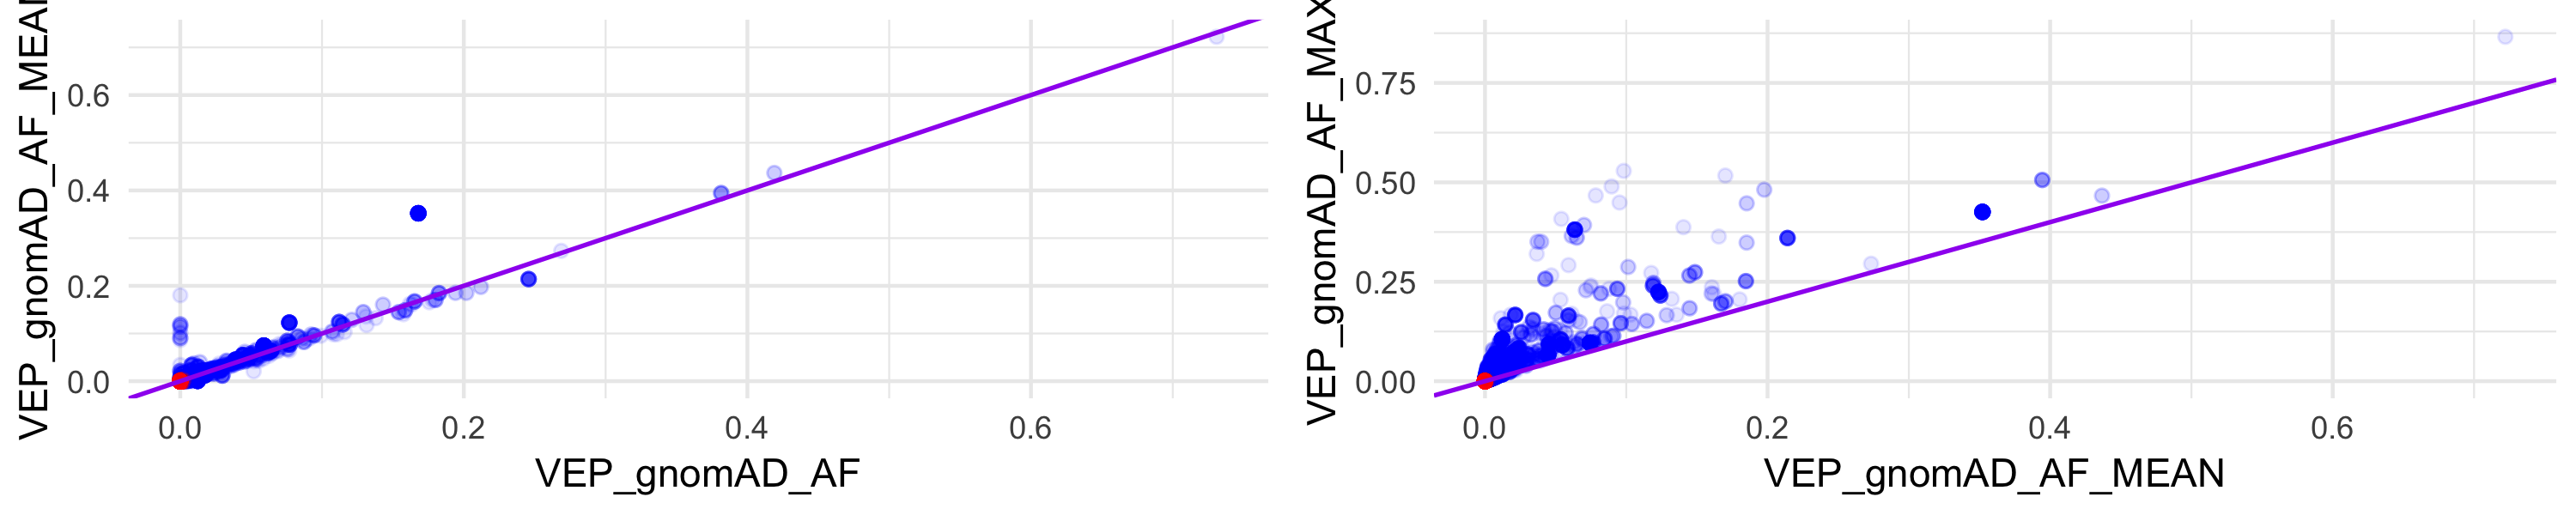

In [122]:
plot1 <- plot_density_2d(impact, "VEP_gnomAD_AF", "VEP_gnomAD_AF_MEAN", points_only = TRUE, height = 2) + geom_abline(intercept = 0, slope = 1, color ="purple", size = 0.6)
plot2 <- plot_density_2d(impact, "VEP_gnomAD_AF_MEAN", "VEP_gnomAD_AF_MAX", points_only = TRUE, height = 2) + geom_abline(intercept = 0, slope = 1, color ="purple", size = 0.6)
plot_side_by_side(plot1, plot2)

In [123]:
impact[, colnames(impact)[grepl("VEP_gnomAD_genome", colnames(impact))]] <- NULL
impact[, colnames(impact)[grepl("VEP_gnomAD_exome", colnames(impact))]] <- NULL
impact[, colnames(impact)[grepl("VEP_gnomAD_total_AC.AN", colnames(impact))]] <- NULL
vep_gnomad_colnames <- c("VEP_gnomAD_AF",
                         "VEP_gnomAD_total_AC.AN_AFR",
                         "VEP_gnomAD_total_AC.AN_AMR",
                         "VEP_gnomAD_total_AC.AN_ASJ",
                         "VEP_gnomAD_total_AC.AN_EAS",
                         "VEP_gnomAD_total_AC.AN_FIN",
                         "VEP_gnomAD_total_AC.AN_NFE",
                         "VEP_gnomAD_total_AC.AN_OTH",
                         "VEP_gnomAD_AF_MAX",
                         "VEP_gnomAD_AF_MEAN")

## Annotate

### `Kaviar_AF`

Get the `Kaviar_AF` feature from `all_IMPACT_mutations_180508.simple.hg19_multianno.txt` (impact annotated by Dominik).

#### Get the raw data

In [124]:
impact_kaviar <- read.table("../../data/dominik/all_IMPACT_mutations_180508.simple.hg19_multianno.txt",
                            sep = "\t", stringsAsFactors = FALSE, header = TRUE)

In [125]:
ncol(impact_kaviar)
nrow(impact_kaviar)
head(impact_kaviar)

[1] 44

[1] 588547

Chr,Start,End,Ref,Alt,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm.MKL_coding_score,fathmm.MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP.._RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds,X1000g2015aug_all,Kaviar_AF,Kaviar_AC,Kaviar_AN,cosmic70
1,16265908,16265908,A,T,0.0,D,0.999,D,0.982,D,.,.,1.000,D,2.275,M,1.9,T,-3.37,D,0.897,5.149,25.4,0.962,0.979,D,-0.869,T,0.155,T,0.672,0,4.81,1.062,1.199,1.000,1.000,12.000,.,.,.,.,.
2,29543736,29543736,A,G,0.539,T,0.0,B,0.0,B,0.151,N,1,D,0,N,4.55,T,0.34,N,0.117,-0.045,2.178,0.629,0.059,N,-0.779,T,0.001,T,0.428,0,2.96,-0.056,0.117,0.186,0.336,6.380,0.0159744,0.0300125,4640,154602,ID=COSM3758202;OCCURENCE=1(large_intestine)
2,242793433,242793433,G,A,0.019,D,0.816,P,0.261,B,0.072,N,1,P,1.185,L,-0.1,T,-1.18,N,0.275,1.737,14.62,0.989,0.037,N,-0.921,T,0.000,T,0.635,0,2.9,0.868,0.782,0.013,0.002,7.501,0.136781,0.0760792,11762,154602,.
5,56177843,56177843,C,G,0.002,D,0.102,B,0.078,B,0.000,D,0.978,N,0,N,1.46,T,-0.13,N,0.086,2.995,22.2,0.960,0.939,D,-1.043,T,0.012,T,0.707,0,3.87,0.871,0.935,0.982,0.984,13.098,0.00738818,0.0141072,2181,154602,.
5,180030313,180030313,C,A,0.65,T,0.0,B,0.001,B,.,.,1,P,0.345,N,-0.86,T,0.12,N,0.038,0.068,3.268,0.393,0.034,N,-1.077,T,0.004,T,0.646,0,-8.82,0.021,-1.521,0.004,0.001,2.012,.,0.0789964,12213,154602,.
5,180051003,180051003,T,C,0.225,T,0.029,B,0.015,B,.,.,1.000,P,1.155,L,-3.42,D,-0.79,N,0.092,-0.877,0.029,0.804,0.078,N,-0.720,T,0.028,T,0.701,0,2.25,0.079,0.888,0.897,0.281,5.808,0.0529153,0.0911566,14093,154602,.


#### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `impact_kaviar`. The keys will be: 
* `mut_key` for `impact`
* `Chr`\_`Start`\_`Ref`\_`Alt` for `impact_kaviar`

In [126]:
# create the impact_kaviar join_key
impact_kaviar$join_key <- paste(impact_kaviar$Chr,
                                impact_kaviar$Start,
                                impact_kaviar$Ref,
                                impact_kaviar$Alt,
                                sep = '_')

**Verification 1** The feature `Kaviar_AF` is unique for each `join_key`:

In [127]:
impact_kaviar <- unique(impact_kaviar[, c("join_key", "Kaviar_AF")])
impact_kaviar %>% group_by(join_key) %>% filter(n() > 1)

join_key,Kaviar_AF


**Verification 2** Every impact `mut_key` has an analoguous `join_key` in `impact_kaviar`:

In [128]:
nrow(impact[! impact$mut_key %in% impact_kaviar$join_key,])

[1] 0

In [129]:
impact[, "Kaviar_AF"] <- left_join(impact,
                                   impact_kaviar,
                                   by = c("mut_key" = "join_key"))[, "Kaviar_AF"]

#### `Kaviar_AF`

We assume every value `'.'` of the `Kaviar_AF` feature is 0 (ie `'0'`). We convert every `Kaviar_AF` string to a double, to obtain the final feature.

In [130]:
dd <- head(unique(impact$Kaviar_AF), 10)
dd[dd == '.'] <- "0"
dd <- data.frame(dd, sapply(dd, function(s) as.double(s)), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old,new
0,0.0000000
6.5e-06,0.0000065
1.29e-05,0.0000129
5.17e-05,0.0000517
0.0006404,0.0006404
0.0021863,0.0021863
5.82e-05,0.0000582
0.0005757,0.0005757
0.0010931,0.0010931
2.59e-05,0.0000259


In [131]:
impact$Kaviar_AF[impact$Kaviar_AF == '.'] <- "0"
impact$Kaviar_AF <- sapply(impact$Kaviar_AF, function(s) as.double(s))

### OncoKB annotations

Get the `is_a_hotspot`,`is_a_3d_hotspot` and `oncogenic` features from `oncokb_annotated_cleaned_IMPACT_mutations_180508.txt` (impact annotated by Pierre with oncokb-annotator, see ...).

#### Get the raw data

In [132]:
impact_oncokb <- read.table("../../data/annotate_with_oncokb_final_dataset/oncokb_annotated_final_IMPACT_mutations_180508.txt",
                             sep = "\t", stringsAsFactors = FALSE, header = TRUE)

In [133]:
ncol(impact_oncokb)
nrow(impact_oncokb)
head(impact_oncokb)

[1] 19

[1] 132274

mut_key,Hugo_Symbol,VEP_Consequence,VEP_VARIANT_CLASS,HGVSp_Short,Variant_Classification,is.a.hotspot,is.a.3d.hotspot,mutation_effect,oncogenic,LEVEL_1,LEVEL_2A,LEVEL_2B,LEVEL_3A,LEVEL_3B,LEVEL_4,LEVEL_R1,Highest_level,citations
17_7577515_T_G,TP53,missense_variant,SNV,p.T256P,Missense_Mutation,,,Likely Loss-of-function,Likely Oncogenic,NA,NA,,NA,,,NA,,8023157;11900253
1_46521514_G_C,PIK3R3,missense_variant,SNV,p.I298M,Missense_Mutation,,,,,NA,NA,,NA,,,NA,,
3_142178126_C_A,ATR,missense_variant,SNV,p.R2431M,Missense_Mutation,,,,,NA,NA,,NA,,,NA,,
4_55139732_T_A,PDGFRA,missense_variant,SNV,p.L465M,Missense_Mutation,,,,,NA,NA,,NA,,,NA,,
4_153249542_C_A,FBXW7,splice_acceptor_variant,SNV,unknown,Splice_Site,,,,Likely Oncogenic,NA,NA,,NA,,,NA,,
4_153332775_C_A,FBXW7,stop_gained,SNV,p.G61*,Nonsense_Mutation,,,,Likely Oncogenic,NA,NA,,NA,,,NA,,


#### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `impact_oncokb`. The keys will be `mut_key` for both dataset, and are already created.

**Verification 1** The features `oncogenic`, `is.a.hotspot`, and `is.a.3d.hotspot` are unique for each `mut_key`:

In [134]:
impact_oncokb <- unique(impact_oncokb[, c("mut_key", "is.a.hotspot", "is.a.3d.hotspot", "oncogenic")])
impact_oncokb %>% group_by(mut_key) %>% filter(n() > 1) %>% arrange(mut_key)

mut_key,is.a.hotspot,is.a.3d.hotspot,oncogenic


**Verification 2** Every impact `mut_key` has an analoguous `join_key` in `impact_oncokb`:

In [135]:
nrow(impact[! impact$mut_key %in% impact_oncokb$mut_key,])

[1] 2

In [136]:
impact[, c("is_a_hotspot",
           "is_a_3d_hotspot",
           "oncogenic")] <- left_join(impact, impact_oncokb,
                                      by = c("mut_key" = "mut_key"))[, c("is.a.hotspot",
                                                                         "is.a.3d.hotspot",
                                                                         "oncogenic")]

#### Process raw features

**`is_a_hotspot`**

In [137]:
impact$is_a_hotspot[impact$is_a_hotspot == "Y"  ] <- "yes"
impact$is_a_hotspot[impact$is_a_hotspot != "yes"] <- "unknown"
get_table(impact$is_a_hotspot)

values,count,freq
unknown,169621,87.3%
yes,24588,12.7%
-- total --,194211,100%


**`is_a_3d_hotspot`**

In [138]:
impact$is_a_3d_hotspot[impact$is_a_3d_hotspot == "Y"  ] <- "yes"
impact$is_a_3d_hotspot[impact$is_a_3d_hotspot != "yes"] <- "unknown"
get_table(impact$is_a_3d_hotspot)

values,count,freq
unknown,179425,92.4%
yes,14784,7.6%
-- total --,194211,100%


**`oncogenic`**

In [139]:
impact$oncogenic[impact$oncogenic == ""] <- "Unknown"
get_table(impact$oncogenic)

values,count,freq
Unknown,145025,74.7%
Likely Oncogenic,31292,16.1%
Oncogenic,14266,7.3%
Predicted Oncogenic,2953,1.5%
Likely Neutral,377,0.2%
Inconclusive,296,0.2%
-- total --,194211,100%


### CancerGenesList

Get the `gene_type` feature from `CancerGenesList.txt` (downloaded from http://oncokb.org/#/cancerGenes, the upper right button "CANCER GENE LIST").

#### Get the raw data

In [140]:
cancer_genes_list <- read.table("../../data/other_databases/CancerGenesList.txt",
                                sep = "\t", stringsAsFactors = FALSE, header = TRUE, comment.char = '')

In [141]:
ncol(cancer_genes_list)
nrow(cancer_genes_list)
head(cancer_genes_list)

[1] 11

[1] 1019

Hugo.Symbol,X..of.occurence.within.resources,OncoKB.Annotated,OncoKB.Oncogene,OncoKB.TSG,MSK.IMPACT,MSK.HEME,Foundation.One,Foundation.One.Heme,Vogelstein,Sanger.CGC
ABL1,7,Yes,Yes,,Yes,Yes,Yes,Yes,Yes,Yes
ABL2,3,No,,,No,No,Yes,Yes,No,Yes
ACTB,1,No,,,No,No,No,Yes,No,No
ACTG1,1,No,,,No,Yes,No,No,No,No
ACVR1,3,Yes,Yes,,Yes,No,No,No,No,Yes
ACVR1B,2,No,,,No,No,Yes,No,Yes,No


#### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `cancer_genes_list`. The keys will be: 
* `VEP_SYMBOL` for `impact`
* `Hugo.Symbol` for `impact_annotated`

**Verification 1** The feature `OncoKB.Oncogene` and `OncoKB.TSG` are unique for each key:

In [142]:
cancer_genes_list <- unique(cancer_genes_list[, c("Hugo.Symbol", "OncoKB.Oncogene", "OncoKB.TSG")])
cancer_genes_list %>% group_by(Hugo.Symbol) %>% filter(n() > 1)

Hugo.Symbol,OncoKB.Oncogene,OncoKB.TSG


**Verification 2** Some impact `VEP_SYMBOL` don't have an analoguous `Hugo.Symbol` in `impact_annotated`, some `NA` values will appear and need to be handled:

In [143]:
length(unique(impact$VEP_SYMBOL[! impact$VEP_SYMBOL %in% cancer_genes_list$Hugo.Symbol]))
print(unique(impact$VEP_SYMBOL[! impact$VEP_SYMBOL %in% cancer_genes_list$Hugo.Symbol]))

[1] 15

 [1] "INSRR"          "RP11-211G3.3"   "AC008738.1"     "OBSL1"         
 [5] "TIMM8B"         "CTD-2561B21.3"  "RP1-85F18.6"    "SDCCAG8"       
 [9] "MFSD11"         "SMIM4"          "AC129492.6"     "SETD8"         
[13] "RP11-354M1.2"   "RTEL1-TNFRSF6B" "BZRAP1-AS1"    


In [144]:
impact[, c("OncoKB.Oncogene", "OncoKB.TSG")] <- left_join(impact, cancer_genes_list,
                                                          by = c("VEP_SYMBOL" = "Hugo.Symbol"))[,c("OncoKB.Oncogene", "OncoKB.TSG")]

In [145]:
head(impact)

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,confidence_class,sample_coverage,mut_key,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_EXON,VEP_INTRON,VEP_IMPACT,VEP_CLIN_SIG,VEP_COSMIC_CNT,VEP_gnomAD_AF,sample_mut_key,patient_key,frequency_in_normals,VEP_SIFT_class,VEP_SIFT_score,VEP_PolyPhen_class,VEP_PolyPhen_score,VEP_gnomAD_total_AF_AFR,VEP_gnomAD_total_AF_AMR,VEP_gnomAD_total_AF_ASJ,VEP_gnomAD_total_AF_EAS,VEP_gnomAD_total_AF_FIN,VEP_gnomAD_total_AF_NFE,VEP_gnomAD_total_AF_OTH,VEP_gnomAD_AF_MAX,VEP_gnomAD_AF_MEAN,Kaviar_AF,is_a_hotspot,is_a_3d_hotspot,oncogenic,OncoKB.Oncogene,OncoKB.TSG
34,TP53,17,7577515,7577515,nonsynonymous_SNV,SNP,T,G,P-0000012-T02-IM3,c.766A>C,p.T256P,227,0.50220,114,569,0.00000,0,59,54,58,56,AUTO_OK,344,17_7577515_T_G,Sub,TP53,c.766A>C,p.T256P,non_synonymous_codon,missense_variant,TP53,c.766A>C,p.T256P,T/P,SNV,7|11,NA,MODERATE,unknown,1,0.000e+00,P-0000012-T02-IM3_17_7577515_T_G,P-0000012,0,deleterious,0.00,probably_damaging,0.999,0,0,0,0,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.0e+00,unknown,unknown,Likely Oncogenic,,Yes
37,PIK3R3,1,46521514,46521514,nonsynonymous_SNV,SNP,G,C,P-0000012-T03-IM3,c.894C>G,p.I298M,733,0.17599,129,1243,0.00000,0,288,316,61,68,AUTO_OK,428,1_46521514_G_C,Sub,PIK3R3,c.1032C>G,p.I344M,non_synonymous_codon,missense_variant,PIK3R3,c.894C>G,p.I298M,I/M,SNV,7|10,NA,MODERATE,unknown,0,0.000e+00,P-0000012-T03-IM3_1_46521514_G_C,P-0000012,0,deleterious,0.00,benign,0.277,0,0,0,0,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.0e+00,unknown,unknown,Unknown,,Yes
38,ATR,3,142178126,142178126,nonsynonymous_SNV,SNP,C,A,P-0000012-T03-IM3,c.7292G>T,p.R2431M,482,0.17427,84,581,0.00172,1,221,177,46,38,AUTO_OK,428,3_142178126_C_A,Sub,ATR,c.7292G>T,p.R2431M,non_synonymous_codon,missense_variant,ATR,c.7292G>T,p.R2431M,R/M,SNV,43|47,NA,MODERATE,unknown,0,4.063e-06,P-0000012-T03-IM3_3_142178126_C_A,P-0000012,0,deleterious,0.00,probably_damaging,0.997,0,0,0,0,0,8.959771e-06,0,8.959771e-06,4.644035e-06,6.5e-06,unknown,unknown,Unknown,,Yes
39,PDGFRA,4,55139732,55139732,nonsynonymous_SNV,SNP,T,A,P-0000012-T03-IM3,c.1393T>A,p.L465M,570,0.20351,116,811,0.00000,0,252,202,66,50,AUTO_OK,428,4_55139732_T_A,Sub,PDGFRA,c.1393T>A,p.L465M,non_synonymous_codon,missense_variant,PDGFRA,c.1393T>A,p.L465M,L/M,SNV,10|23,NA,MODERATE,unknown,0,0.000e+00,P-0000012-T03-IM3_4_55139732_T_A,P-0000012,0,deleterious,0.01,probably_damaging,0.965,0,0,0,0,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.0e+00,unknown,unknown,Unknown,Yes,
40,FBXW7,4,153249542,153249542,splicing,SNP,C,A,P-0000012-T03-IM3,c.1237-1G>T,,333,0.25526,85,458,0.00000,0,69,179,24,61,AUTO_OK,428,4_153249542_C_A,Sub,FBXW7,c.1237-1G>T,p.?,splice_site_variant,splice_acceptor_variant,FBXW7,c.1237-1G>T,unknown,unknown,SNV,NA,8|11,HIGH,unknown,0,0.000e+00,P-0000012-T03-IM3_4_153249542_C_A,P-0000012,0,unknown,NA,unknown,NA,0,0,0,0,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.0e+00,unknown,unknown,Likely Oncogenic,,Yes
41,FBXW7,4,153332775,153332775,stopgain_SNV,SNP,C,A,P-0000012-T03-IM3,c.181G>T,p.G61*,570,0.22807,130,908,0.00000,0,243,197,70,60,AUTO_OK,428,4_153332775_C_A,Sub,FBXW7,c.181G>T,p.G61*,stop_gained,stop_gained,FBXW7,c.181G>T,p.G61*,G/*,SNV,2|12,NA,HIGH,unknown,0,0.000e+00,P-0000012-T03-IM3_4_153332775_C_A,P-0000012,0,unknown,NA,unknown,NA,0,0,0,0,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0.0e+00,unknown,unknown,Likely Oncogenic,,Yes


#### `gene_type`

In [146]:
head(unique(impact$OncoKB.Oncogene))
head(unique(impact$OncoKB.TSG))

[1] ""    "Yes" NA

[1] "Yes" ""    NA

In [147]:
impact$gene_type <- "unknown"
impact$gene_type[impact$OncoKB.Oncogene == "Yes"] <- "oncogene"
impact$gene_type[impact$OncoKB.TSG == "Yes"] <- "tsg"
impact$gene_type[impact$OncoKB.Oncogene == "Yes" & impact$OncoKB.TSG == "Yes"] <- "oncogene_and_tsg"

impact$OncoKB.Oncogene <- NULL
impact$OncoKB.TSG      <- NULL

In [148]:
table(impact$gene_type)


        oncogene oncogene_and_tsg              tsg          unknown 
           48063             4743            95804            45601 

## Save table

In [153]:
write.table(impact, "../../data/final_IMPACT_mutations_180508.txt", sep = "\t", row.names = FALSE)

## Compare with the old impact

* `impact` and `impact_old` share 193320 mutations in common
* 891 mutations in `impact` only
* 4595 mutations in `impact_old` only

In [187]:
impact_old <- read.table("../../data/cleaned_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)
impact_old <- add_features("../../data/", impact_old, annotations = TRUE, oncokb = TRUE, gene_type = TRUE)
impact_old <- impact_old[! impact_old$confidence_class %in% c("UNKNOWN", "OK_NOT_SO"),]

In [188]:
get_table(impact$sample_mut_key %in% impact_old$sample_mut_key)

values,count,freq
TRUE,193320,99.5%
FALSE,891,0.5%
-- total --,194211,100%


In [189]:
get_table(impact_old$sample_mut_key %in% impact$sample_mut_key)

values,count,freq
TRUE,193320,97.7%
FALSE,4594,2.3%
-- total --,197914,100%


In [190]:
cbind(get_table(impact_old$oncogenic), " | ", get_table(impact$oncogenic))

values,count,freq,""" | """,values,count,freq
Unknown,130325,65.8%,|,Unknown,145025,74.7%
Likely Oncogenic,48706,24.6%,|,Likely Oncogenic,31292,16.1%
Oncogenic,15095,7.6%,|,Oncogenic,14266,7.3%
Predicted Oncogenic,2884,1.5%,|,Predicted Oncogenic,2953,1.5%
Inconclusive,518,0.3%,|,Likely Neutral,377,0.2%
Likely Neutral,386,0.2%,|,Inconclusive,296,0.2%
-- total --,197914,100%,|,-- total --,194211,100%


In [191]:
impact_old <- left_join(impact_old, impact[, c("sample_mut_key", "oncogenic", "VEP_Consequence")],
                              by = c("sample_mut_key" = "sample_mut_key"))
colnames(impact_old)[colnames(impact_old) == "oncogenic.x"] <- "oncogenic"
colnames(impact_old)[colnames(impact_old) == "oncogenic.y"] <- "oncogenic_new"

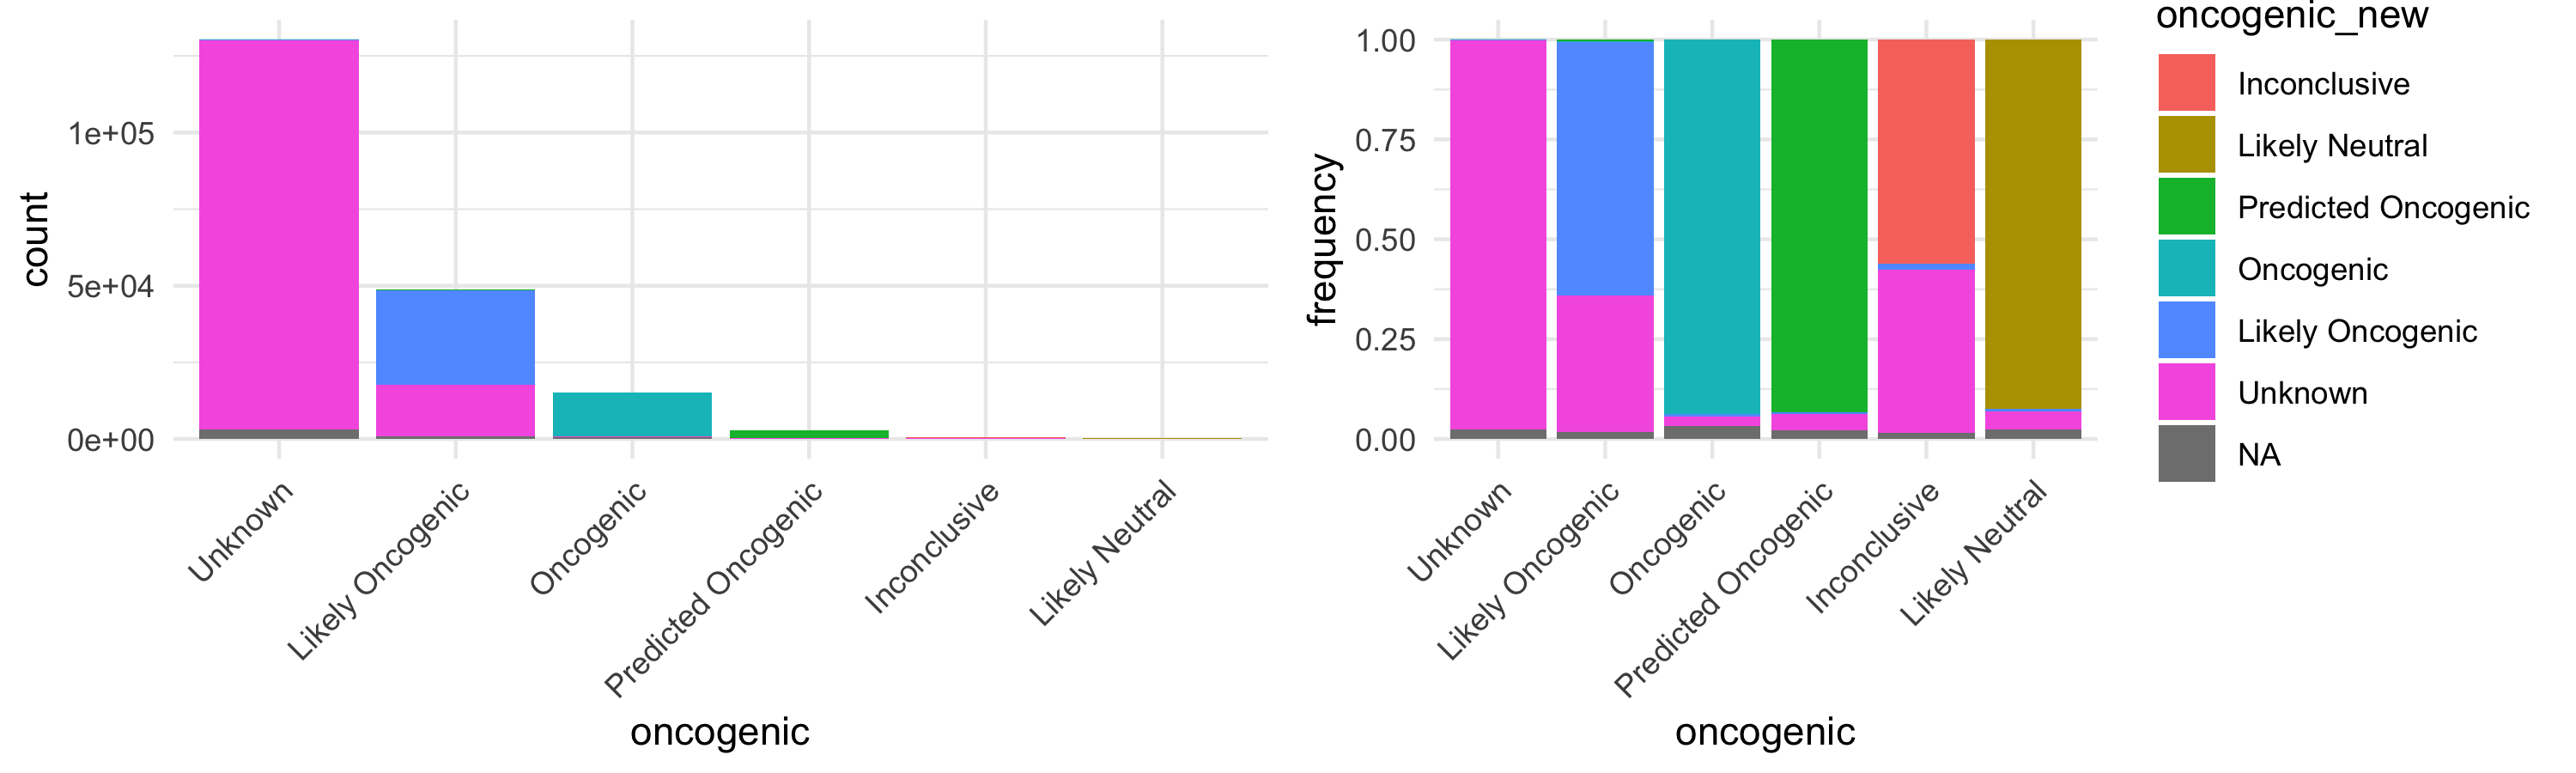

In [192]:
plot_contingency_table_as_histograms(impact_old, "oncogenic", "oncogenic_new")

In [193]:
get_table(impact_old$Consequence[impact_old$oncogenic == "Likely Oncogenic" & impact_old$oncogenic_new == "Unknown"])

values,count,freq
frameshift_deletion,11242,67.5%
frameshift_insertion,4633,27.8%
stopgain_SNV,382,2.3%
nonsynonymous_SNV,216,1.3%
splicing,179,1.1%
nonframeshift_deletion,13,0.1%
-- total --,17550,100%


In [194]:
get_table(impact_old$VEP_Consequence[impact_old$oncogenic == "Likely Oncogenic" & impact_old$oncogenic_new == "Unknown"])

values,count,freq
frameshift_variant,16310,97.9%
missense_variant,204,1.2%
stop_gained,39,0.2%
splice_donor_variant,37,0.2%
splice_acceptor_variant,33,0.2%
stop_lost,27,0.2%
start_lost,10,0.1%
inframe_deletion,3,0%
inframe_insertion,2,0%
-- total --,17550,100%


In [195]:
get_table(impact$oncogenic[impact$VEP_Consequence == "frameshift_variant"])

values,count,freq
Unknown,22293,93.6%
Likely Oncogenic,1155,4.9%
Predicted Oncogenic,236,1%
Oncogenic,125,0.5%
Likely Neutral,1,0%
-- total --,23810,100%


In [197]:
get_table(impact_old$oncogenic[impact_old$Consequence %in% c("frameshift_insertion", "frameshift_deletion")])

values,count,freq
Likely Oncogenic,17241,74.5%
Unknown,5599,24.2%
Inconclusive,208,0.9%
Oncogenic,106,0.5%
-- total --,23154,100%
